In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(work_path)

from my_helper.regression import *
from my_helper.util import *
from my_helper.plot import *
from my_helper.analysis import *
from yjk_module.preprocessing import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.gridspec import GridSpec

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.unicode_minus"] = False

### Îç∞Ïù¥ÌÑ∞ ÏùΩÍ∏∞

In [3]:
origin = pd.read_csv("./data/Used_Car_Dataset.csv", index_col = 0)
df = origin.copy()

### EDA(1)

#### ÏÉÅÏúÑ 5Í∞ú Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå Î∞è ÌÅ¨Í∏∞

In [4]:
df.head()

car_name registration_year  \
0                    2017 Mercedes-Benz S-Class S400            Jul-17   
1  2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI            Jan-21   
2                       2018 BMW X1 sDrive 20d xLine            Sep-18   
3                           2019 Kia Seltos GTX Plus            Dec-19   
4                    2019 Skoda Superb LK 1.8 TSI AT            Aug-19   

  insurance_validity fuel_type  seats  kms_driven   ownsership transmission  \
0      Comprehensive    Petrol      5       56000  First Owner    Automatic   
1      Comprehensive    Petrol      5       30615  First Owner    Automatic   
2      Comprehensive    Diesel      5       24000  First Owner    Automatic   
3      Comprehensive    Petrol      5       18378  First Owner       Manual   
4      Comprehensive    Petrol      5       44900  First Owner    Automatic   

  manufacturing_year  mileage(kmpl)  engine(cc)  max_power(bhp)  torque(Nm)  \
0               2017           7.81      2996.0          2996.0       333.0   
1               2020          17.40       999.0           999.0      9863.0   
2               2018          20.68      1995.0          1995.0       188.0   
3               2019          16.50      1353.0          1353.0     13808.0   
4               2019          14.67      1798.0          1798.0     17746.0   

   price(in lakhs)  
0            63.75  
1             8.99  
2            23.75  
3            13.56  
4            24.00

In [5]:
df.shape

(1553, 14)

#### Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1553 entries, 0 to 1552
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1553 non-null   object 
 1   registration_year   1553 non-null   object 
 2   insurance_validity  1553 non-null   object 
 3   fuel_type           1553 non-null   object 
 4   seats               1553 non-null   int64  
 5   kms_driven          1553 non-null   int64  
 6   ownsership          1553 non-null   object 
 7   transmission        1553 non-null   object 
 8   manufacturing_year  1553 non-null   object 
 9   mileage(kmpl)       1550 non-null   float64
 10  engine(cc)          1550 non-null   float64
 11  max_power(bhp)      1550 non-null   float64
 12  torque(Nm)          1549 non-null   float64
 13  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 182.0+ KB


#### Í∏∞Ïà†ÌÜµÍ≥Ñ

In [7]:
df.describe()

seats     kms_driven  mileage(kmpl)    engine(cc)  \
count   1553.000000    1553.000000    1550.000000  1.550000e+03   
mean      91.480361   52841.931101     236.927277  1.471857e+10   
std     2403.424060   40067.800347     585.964295  2.185629e+11   
min        4.000000     620.000000       7.810000  5.000000e+00   
25%        5.000000   30000.000000      16.342500  1.197000e+03   
50%        5.000000   49134.000000      18.900000  1.462000e+03   
75%        5.000000   70000.000000      22.000000  1.995000e+03   
max    67000.000000  810000.000000    3996.000000  3.258640e+12   

       max_power(bhp)    torque(Nm)  price(in lakhs)  
count    1.550000e+03  1.549000e+03      1553.000000  
mean     1.471857e+10  1.423989e+04       166.141494  
std      2.185629e+11  9.666241e+04      3478.855090  
min      5.000000e+00  5.000000e+00         1.000000  
25%      1.197000e+03  4.000000e+02         4.660000  
50%      1.462000e+03  1.173000e+03         7.140000  
75%      1.995000e+03  8.850000e+03        17.000000  
max      3.258640e+12  1.464800e+06     95000.000000

In [8]:
df.describe(include = 'O')

car_name registration_year insurance_validity  \
count                               1553              1553               1553   
unique                               925               178                  6   
top     2017 BMW X1 sDrive20d Expedition              2017      Comprehensive   
freq                                  25                40               1084   

       fuel_type   ownsership transmission manufacturing_year  
count       1553         1553         1553               1553  
unique         4           22           13                 19  
top       Petrol  First Owner       Manual               2018  
freq        1013         1240          835                236

- Ï¢ÖÏÜçÎ≥ÄÏàòÎäî price(in lakhs)
- seats Ïó¥ÏùÄ Ï¢åÏÑù ÏàòÎ°ú, Ïù¥ÏÇ∞Ìòï Îç∞Ïù¥ÌÑ∞Ïù¥Îã§. ÏàòÏπòÌòïÍ≥º Î™ÖÎ™©Ìòï Ïñ¥ÎäêÏ™ΩÏúºÎ°úÎì† Î∂ÑÏÑùÌï† Ïàò ÏûàÎã§.
- kms_driven, mileage, engine, max_power, torqueÎäî Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞Ïù¥Îã§.
    - engineÍ≥º max_powerÏùò Í≤ΩÏö∞ ÏôÑÏ†ÑÌûà ÎèôÏùºÌïú Îç∞Ïù¥ÌÑ∞Î°ú ÌïúÏ™ΩÏùÄ ÏÇ≠Ï†úÌïúÎã§.
    - ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞Ïùò Í≤ΩÏö∞ ÏÉÅÏãùÏ†ÅÏúºÎ°ú ÌåêÎã®ÌïòÏòÄÏùÑ Îïå Ïù¥ÏÉÅÏπòÎ°ú Î≥¥Ïù¥Îäî Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïúÎã§ (Ï¢åÏÑùÏàò 67000Í∞ú)
        - Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Ïùò Í≤ΩÏö∞ Î≥ÑÎèÑÏùò Ï†ïÏ†úÍ∞Ä ÌïÑÏöîÌïòÎã§
- car_nameÏùÄ Ï¥ù Îç∞Ïù¥ÌÑ∞ Ïàò ÎåÄÎπÑ Ï¢ÖÎ•òÏàòÍ∞Ä ÎÑàÎ¨¥ ÎßéÏïÑ Î∂ÑÏÑùÏóê Ïú†ÏùòÌïòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞Ïùº ÌôïÎ•†Ïù¥ ÎÜíÎã§
- registration_year, manufacturing_yearÏùò ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏúºÎÇò Î™ÖÎ™©Ìòï Îç∞Ïù¥ÌÑ∞Î°ú Íµ¨Î∂ÑÎêòÏóàÎã§.
  - ÌäπÏ†ï Îç∞Ïù¥ÌÑ∞Ïóê ÏùòÌïòÏó¨ Î™ÖÎ™©Ìòï Îç∞Ïù¥ÌÑ∞Í∞Ä ÎêòÏóàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎã§.
- Í∑∏Ïô∏ Î™ÖÎ™©Ìòï Îç∞Ïù¥ÌÑ∞Ïùò Í≤ΩÏö∞ Îç∞Ïù¥ÌÑ∞ Ï¢ÖÎ•ò ÏàòÍ∞Ä ÎßéÏßÄ ÏïäÏïÑ Î∂ÑÏÑùÏóê Ï∂©Î∂ÑÌûà ÌôúÏö©Ïù¥ Í∞ÄÎä•Ìï† Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.

In [9]:
df.drop('max_power(bhp)', axis = 1, inplace = True)

#### Í≤∞Ï∏°Ïπò ÌôïÏù∏

In [10]:
df.isnull().sum()

car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            3
torque(Nm)            4
price(in lakhs)       0
dtype: int64

- Í≤∞Ï∏°Ïπò Í∞ØÏàòÎäî Ï†ÅÍ∏∞ ÎïåÎ¨∏Ïóê Ï†úÍ±∞

In [11]:
df.dropna(inplace = True)

#### Ïù¥ÏÉÅÏπò ÌôïÏù∏ (Boxplot)

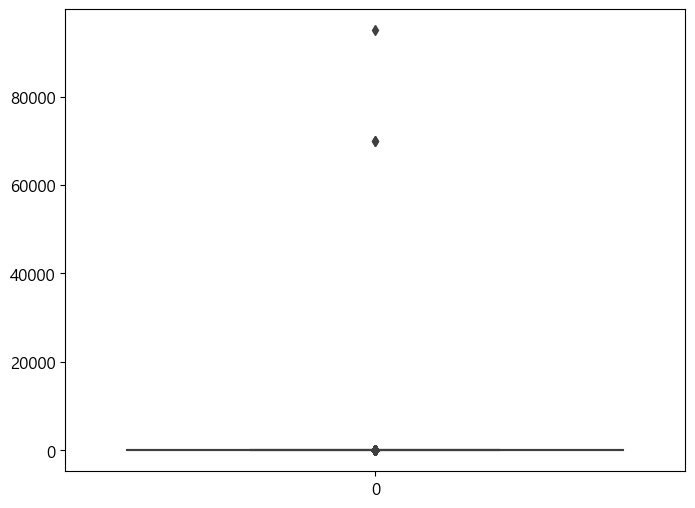

In [12]:
plt.figure()
sb.boxplot(data = df['price(in lakhs)'])
plt.show()

- Ï¢ÖÏÜçÎ≥ÄÏàòÍ∞Ä ÏßÄÎÇòÏπòÍ≤å ÌÅ∞ Ïù¥ÏÉÅÏπòÍ∞Ä 2Í∞ú Ï°¥Ïû¨ÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù¥Î©∞ Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Îäî ÏÇ≠Ï†úÌïúÎã§

In [13]:
df = df[df['price(in lakhs)'] < 10000]

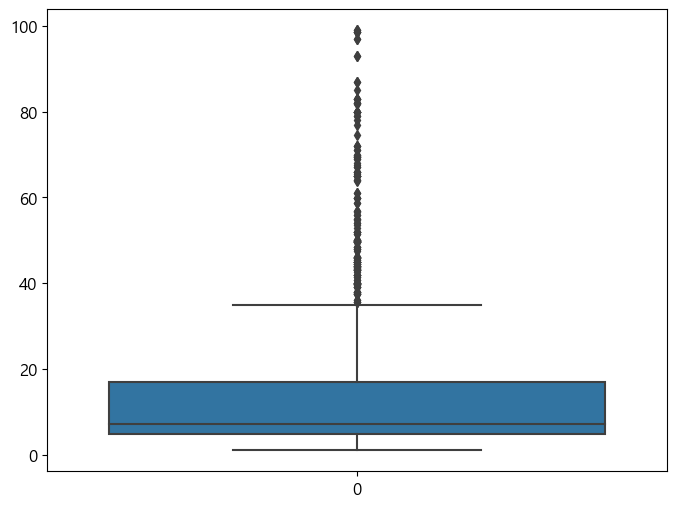

In [14]:
plt.figure()
sb.boxplot(data = df['price(in lakhs)'])
plt.show()

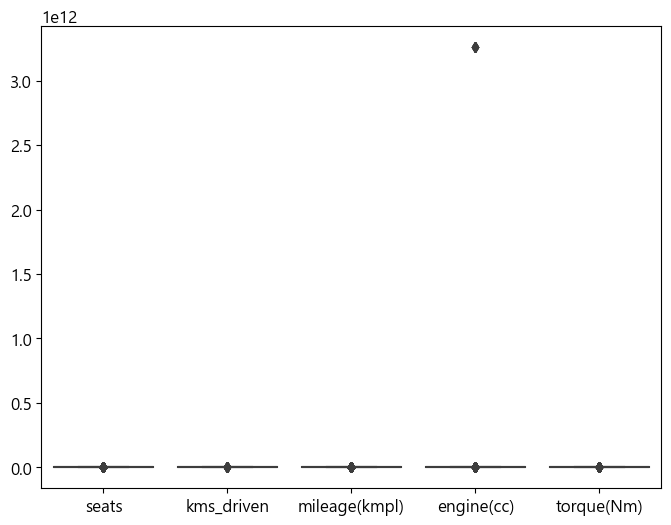

In [15]:
plt.figure()
sb.boxplot(data = df[['seats', 'kms_driven', 'mileage(kmpl)', 'engine(cc)', 'torque(Nm)']])
plt.show()

- Îç∞Ïù¥ÌÑ∞ ÏÉÅÏÑ∏ ÌôïÏù∏ Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÅÌï©ÌïòÏßÄ ÏïäÏùÄ ÌñâÏóê Îì§Ïñ¥Í∞ÄÏÑú Ïù¥ÏÉÅÏπòÎ°ú Í∞êÏßÄÎêòÎäî Í≤ΩÏö∞Í∞Ä ÏûàÎäî Í≤ÉÏúºÎ°ú Ï∂îÏ∏°ÎêúÎã§.
    - ex) fuel_typeÏóê seatsÍ∞Ä Îì§Ïñ¥Í∞Ä ÏûàÎäî Îì±
    - Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Îäî Ïò¨Î∞îÎ•∏ ÏúÑÏπòÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÏòÆÍ≤®Ï£ºÎäî Ï†ÑÏ≤òÎ¶¨ ÏûëÏóÖÏù¥ ÏöîÍµ¨Îê®

#### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

- ÏûòÎ™ªÎêú ÌñâÏóê Í∏∞ÏûÖÎêú Îç∞Ïù¥ÌÑ∞Ïùò Ï≤òÎ¶¨
    - Ïò¨Î∞îÎ•∏ ÌñâÏóê Îç∞Ïù¥ÌÑ∞Î•º ÏòÆÍ∏∞ÎçîÎùºÎèÑ ÎÇ®Í≤®ÏßÑ Í∞íÏùÄ Í≤∞Ï∏°ÏπòÎ°ú Ï≤òÎ¶¨ÎêòÍ∏∞Ïóê Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ ÏàòÍ∞Ä ÎßéÏßÄ ÏïäÏùÄ Í≤ΩÏö∞Îäî ÏÇ≠Ï†ú Ï≤òÎ¶¨

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1546 entries, 0 to 1552
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1546 non-null   object 
 1   registration_year   1546 non-null   object 
 2   insurance_validity  1546 non-null   object 
 3   fuel_type           1546 non-null   object 
 4   seats               1546 non-null   int64  
 5   kms_driven          1546 non-null   int64  
 6   ownsership          1546 non-null   object 
 7   transmission        1546 non-null   object 
 8   manufacturing_year  1546 non-null   object 
 9   mileage(kmpl)       1546 non-null   float64
 10  engine(cc)          1546 non-null   float64
 11  torque(Nm)          1546 non-null   float64
 12  price(in lakhs)     1546 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 201.4+ KB


In [17]:
df['registration_year'].unique()

array(['Jul-17', 'Jan-21', 'Sep-18', 'Dec-19', 'Aug-19', 'Feb-19',
       'Jul-18', 'Apr-15', 'Mar-19', 'Mar-20', 'Feb-22', '2014', 'Jan-22',
       'Apr-19', 'Aug-22', 'Mar-18', 'Nov-19', 'Nov-20', 'Sep-21',
       'Oct-10', 'Sep-15', 'Aug-11', 'Dec-15', 'Aug-17', 'Aug-20', '2018',
       'Oct-19', 'Dec-22', 'Jun-18', '2017', 'Jun-17', 'May-10', 'Mar-23',
       'Nov-15', 'Sep-20', 'Jul-21', 'Aug-18', 'Jun-20', 'Apr-21',
       'Nov-23', 'Dec-20', 'Jun-21', 'May-11', '2016', 'Oct-17', 'Nov-14',
       'Feb-18', '2009', 'Jul-16', 'Aug-21', 'Nov-18', 'Oct-18', 'Mar-17',
       'May-19', 'May-13', 'May-23', 'Jul-14', '2015', 'Sep-16', 'May-22',
       'Aug-15', 'Mar-21', 'Mar-22', 'Oct-20', 'Apr-16', 'Sep-23',
       'Dec-21', 'Nov-21', 'Dec-14', 'Jul-22', 'Jun-23', 'Jul-19',
       'Dec-12', 'Dec-16', 'Jun-16', 'Sep-19', 'Jun-10', 'Oct-14',
       'Mar-16', 'Dec-18', 'Feb-20', 'Apr-20', 'Jan-11', 'Oct-15',
       'Jan-19', '2023', 'Jul-13', 'May-21', 'Aug-13', 'Oct-13', 'Nov-17',
      

- Registration_yearÏùò Third Party insurance (insurance_validityÌñâ Ï∂îÏ†ï) ÏÇ≠Ï†ú

In [18]:
df = df[df['registration_year'] != 'Third Party insurance']

In [19]:
df['ownsership'].unique()

array(['First Owner', 'Second Owner', 'Third Owner', '2993 cc', '1461 cc',
       '998 cc', '1995 cc', '1451 cc', '1998 cc', '1498 cc', '1497 cc',
       '1996 cc', '1950 cc', 'Fifth Owner', '1199 cc', '1248 cc',
       '999 cc', '1197 cc', '1984 cc', '2999 cc', '1968 cc'], dtype=object)

In [20]:
df['ownsership'].value_counts()

First Owner     1236
Second Owner     238
1995 cc           24
Third Owner       20
1498 cc            3
999 cc             2
Fifth Owner        2
1497 cc            2
1451 cc            2
998 cc             2
1461 cc            2
2993 cc            2
1998 cc            1
1996 cc            1
1950 cc            1
1199 cc            1
1248 cc            1
1197 cc            1
1984 cc            1
2999 cc            1
1968 cc            1
Name: ownsership, dtype: int64

- ownsershipÏùò Í≤ΩÏö∞ ccÍ∞Ä Ìè¨Ìï®Îêú Îç∞Ïù¥ÌÑ∞Îäî engine(cc)Îç∞Ïù¥ÌÑ∞Î°ú Ï∂îÏ†ïÎêòÏñ¥ Ìï¥Îãπ Í∞íÏúºÎ°ú Ïù¥Ï†ÑÌïúÎã§. ownsership ÌñâÏóêÏÑúÎäî ÏµúÎπàÍ∞íÏù∏ First OwnerÎ°ú Í∞íÏùÑ ÎåÄÏ≤¥ÌïúÎã§

In [21]:
cond = df[df['ownsership'].str.contains('cc')]
cond.head()

car_name registration_year  \
116                2017 BMW 7 Series 730Ld M Sport              2017   
136                2017 BMW 7 Series 730Ld M Sport              2017   
170  2014 Nissan Terrano XV 110 PS Limited Edition              2014   
190  2014 Nissan Terrano XV 110 PS Limited Edition              2014   
210            2023 Hyundai i20 N-Line N8 DCT BSVI              2023   

        insurance_validity fuel_type  seats  kms_driven ownsership  \
116  Third Party insurance    Diesel      5       60000    2993 cc   
136  Third Party insurance    Diesel      5       60000    2993 cc   
170  Third Party insurance    Diesel      5      100000    1461 cc   
190  Third Party insurance    Diesel      5      100000    1461 cc   
210  Third Party insurance    Petrol      5       10000     998 cc   

    transmission manufacturing_year  mileage(kmpl)  engine(cc)  torque(Nm)  \
116         2017     Power Steering         2993.0     26149.0       620.0   
136         2017     Power Steering         2993.0     26149.0       620.0   
170         2014     Power Steering         1461.0      1085.0       248.0   
190         2014     Power Steering         1461.0      1085.0       248.0   
210         2023     Power Steering          998.0     11841.0       172.0   

     price(in lakhs)  
116             55.0  
136             55.0  
170              6.0  
190              6.0  
210             11.7

In [22]:
df.loc[cond.index, 'engine(cc)'] = cond['ownsership'].apply(lambda x : int(x[:-2].strip()))
df.loc[cond.index, 'ownsership'] = 'First Owner'

In [23]:
df['transmission'].value_counts()

Manual       829
Automatic    667
2017          28
2014           5
2011           3
2023           2
2020           2
2021           2
2022           2
2018           2
2015           1
2016           1
Name: transmission, dtype: int64

- transmissionÏùò Í≤ΩÏö∞ ÌäπÏ†ï Ïó∞ÎèÑÍ∞Ä Ï†ÅÌòÄÏûàÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏúºÎ©∞ Ïù¥Îäî ÏµúÎπàÍ∞íÏù∏ ManualÎ°ú ÎåÄÏ≤¥ÌïúÎã§

In [24]:
cond = df[df['transmission'].str.contains('20')]
df.loc[cond.index, 'transmission'] = 'Manual'

In [25]:
df['manufacturing_year'].value_counts()

2018                   236
2017                   190
2019                   184
2015                   133
2016                   133
2020                   122
2021                   119
2014                   103
2022                    89
2013                    51
2012                    50
Power Steering          46
2023                    35
2011                    22
2010                    18
2009                    10
Power Windows Front      2
2007                     1
Name: manufacturing_year, dtype: int64

- manufacturing_yearÏùò Í≤ΩÏö∞ PowerÍ∞Ä Ìè¨Ìï®Îêú Î¨∏ÏûêÏó¥ Îç∞Ïù¥ÌÑ∞Î•º ÎåÄÏ≤¥Ìï¥Ïïº ÌïòÏßÄÎßå ÌïòÎÇòÏùò ÌäπÏ†ï Í∞íÏúºÎ°ú ÎåÄÏ≤¥ÌïòÍ∏∞Îäî Ïñ¥Î†§Ïõå registration_year Ïó¥Ïùò Í∞íÏúºÎ°ú ÎåÄÏ≤¥Ìï®

In [26]:
cond = df[df['manufacturing_year'].str.contains('Power')]
df.loc[cond.index, 'manufacturing_year'] = cond['registration_year']

In [27]:
df['manufacturing_year'] = df['manufacturing_year'].astype('int')

- Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ : Îç∞Ïù¥ÌÑ∞ ÌòïÎ≥ÄÌôò
    - registration_yearÏóêÎäî ÏõîÍπåÏßÄ Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏúºÎ©∞ Ìï¥Îãπ ÏõîÏùÑ Ï†úÍ±∞ÌïòÍ≥† ÎÖÑÎèÑÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÌÜµÏùº

In [28]:
cond = df[df['registration_year'].str.contains('-')]
df.loc[cond.index, 'registration_year'] = cond['registration_year'].apply(lambda x : int(x[-2:]) + 2000)

In [29]:
df['registration_year'] = df['registration_year'].astype('int')

- Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ : Ïù¥ÏÉÅÏπò Ï†úÍ±∞
    - engineÏùò Ïù¥ÏÉÅÏπòÎäî ÏÇ≠Ï†ú
    - Ïù¥ÌõÑ Boxplot Ïû¨ÌôïÏù∏

In [30]:
df = df[df['engine(cc)'] < 10000]

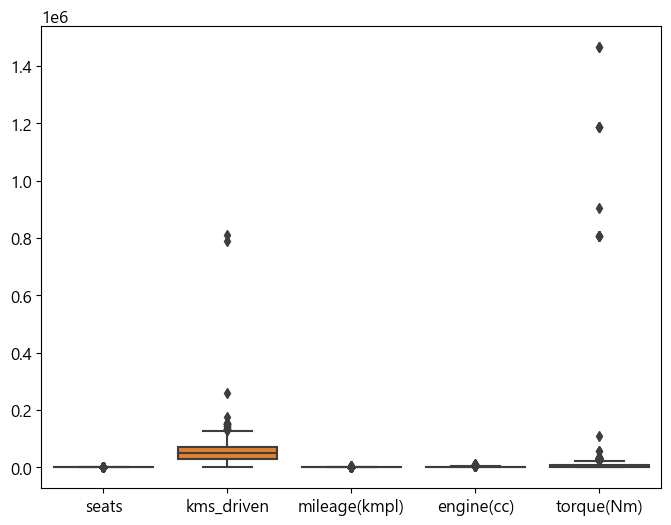

In [31]:
plt.figure()
sb.boxplot(data = df[['seats', 'kms_driven', 'mileage(kmpl)', 'engine(cc)', 'torque(Nm)']])
plt.show()

- kms_driven 250,000 Ïù¥ÏÉÅ, torque 30,000, mileage 100 Ïù¥ÏÉÅÏù∏ Îç∞Ïù¥ÌÑ∞ ÏÇ≠Ï†ú
    - seatsÎäî Î™ÖÎ™©Ìòï Îç∞Ïù¥ÌÑ∞Î°ú Í∞ÑÏ£ºÌïòÏó¨ Ï∂îÍ∞ÄÏ†ÅÏù∏ Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ÏóêÏÑú Ï†úÏô∏
    - Ï≤òÎ¶¨ÌõÑ Boxplot Ïû¨ÌôïÏù∏

In [32]:
df['seats'] = df['seats'].astype('category')

In [33]:
rename_dict = {'mileage(kmpl)' : 'mileage',
               'engine(cc)' : 'engine',
               'torque(Nm)' : 'torque',
               'price(in lakhs)' : 'price'}
df.rename(columns = rename_dict, inplace = True)

In [34]:
df = df.query('kms_driven < 250000 and torque < 30000 and mileage < 100')

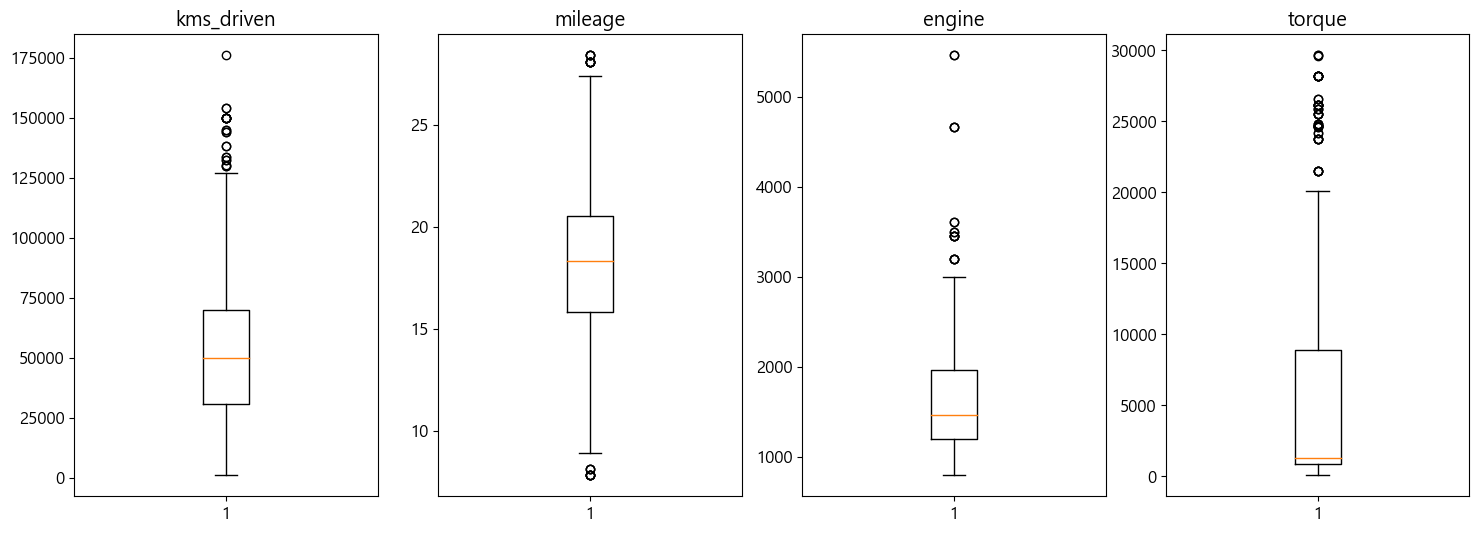

In [35]:
cols = ['kms_driven', 'mileage', 'engine', 'torque']

fig, ax = plt.subplots(1, 4, figsize = (18, 6))
for i, v in enumerate(cols):
    ax[i].boxplot(x = df[v])
    ax[i].set_title(v)
plt.show()

#### Ï§ëÎ≥µÎç∞Ïù¥ÌÑ∞ Ï†úÍ±∞
- Î™®Îì† ÎÇ¥Ïö©Ïù¥ ÏùºÏπòÌïòÎäî Ï§ëÎ≥µÎç∞Ïù¥ÌÑ∞ Ï†úÍ±∞

In [36]:
df.drop_duplicates(inplace = True)

In [37]:
df.reset_index(inplace = True, drop = True)
df.head()

car_name  registration_year  \
0                    2017 Mercedes-Benz S-Class S400               2017   
1  2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI               2021   
2                       2018 BMW X1 sDrive 20d xLine               2018   
3                           2019 Kia Seltos GTX Plus               2019   
4                    2019 Skoda Superb LK 1.8 TSI AT               2019   

  insurance_validity fuel_type seats  kms_driven   ownsership transmission  \
0      Comprehensive    Petrol     5       56000  First Owner    Automatic   
1      Comprehensive    Petrol     5       30615  First Owner    Automatic   
2      Comprehensive    Diesel     5       24000  First Owner    Automatic   
3      Comprehensive    Petrol     5       18378  First Owner       Manual   
4      Comprehensive    Petrol     5       44900  First Owner    Automatic   

   manufacturing_year  mileage  engine   torque  price  
0                2017     7.81  2996.0    333.0  63.75  
1                2020    17.40   999.0   9863.0   8.99  
2                2018    20.68  1995.0    188.0  23.75  
3                2019    16.50  1353.0  13808.0  13.56  
4                2019    14.67  1798.0  17746.0  24.00

### EDA(2)
- Ï†ïÏ†úÌïú Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú ÌäπÏßï Ïû¨ÌôïÏù∏

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   car_name            942 non-null    object  
 1   registration_year   942 non-null    int32   
 2   insurance_validity  942 non-null    object  
 3   fuel_type           942 non-null    object  
 4   seats               942 non-null    category
 5   kms_driven          942 non-null    int64   
 6   ownsership          942 non-null    object  
 7   transmission        942 non-null    object  
 8   manufacturing_year  942 non-null    int32   
 9   mileage             942 non-null    float64 
 10  engine              942 non-null    float64 
 11  torque              942 non-null    float64 
 12  price               942 non-null    float64 
dtypes: category(1), float64(4), int32(2), int64(1), object(5)
memory usage: 82.2+ KB


In [39]:
df.describe()

registration_year     kms_driven  manufacturing_year     mileage  \
count         942.000000     942.000000          942.000000  942.000000   
mean         2017.484076   52821.019108         2017.404459   18.378822   
std             2.828664   28856.243246            2.795339    3.683712   
min          2007.000000    1000.000000         2007.000000    7.810000   
25%          2016.000000   31030.000000         2016.000000   16.125000   
50%          2018.000000   50000.000000         2018.000000   18.600000   
75%          2019.000000   70000.000000         2019.000000   20.700000   
max          2023.000000  176000.000000         2023.000000   28.400000   

            engine        torque       price  
count   942.000000    942.000000  942.000000  
mean   1572.295117   5891.684713   13.568875  
std     563.939138   6661.737754   16.000396  
min     796.000000     67.000000    1.000000  
25%    1197.000000    858.000000    4.950000  
50%    1423.500000   1661.000000    6.950000  
75%    1950.000000   8873.000000   14.185000  
max    5461.000000  29636.000000   98.500000

In [40]:
df.describe(include = ['object', 'category'])

car_name insurance_validity fuel_type  seats  \
count                             942                942       942    942   
unique                            770                  5         3      5   
top     2014 Hyundai Grand i10 Sportz      Comprehensive    Petrol      5   
freq                                6                679       617    833   

         ownsership transmission  
count           942          942  
unique            4            2  
top     First Owner       Manual  
freq            785          535

- 'car_name' Ïó¥ÏùÄ ÏûêÎèôÏ∞® Î™®Îç∏Î™ÖÏù¥Î©∞ Îç∞Ïù¥ÌÑ∞ Ï¢ÖÎ•ò ÏàòÍ∞Ä Îß§Ïö∞ ÎßéÏïÑ Î∂ÑÏÑùÏóê Î¨¥ÏùòÎØ∏ÌïòÎã§Í≥† ÌåêÎã®ÎêòÏñ¥ Ï†úÍ±∞
  - Ìï¥Îãπ Î™ÖÏπ≠ÏùÑ Í∏∞Î∞òÏúºÎ°ú Ï∞®ÎüâÏùò Ï†úÏõê Îç∞Ïù¥ÌÑ∞Î•º Ïô∏Î∂ÄÎ°úÎ∂ÄÌÑ∞ Í∞ÄÏ†∏ÏôÄ Î∂ÑÏÑùÏóê ÌôúÏö©Ìï† Ïàò ÏûàÏúºÎÇò Í≥†Î†§ÌïòÏßÄ ÏïäÏùå

In [41]:
df.drop('car_name', axis = 1, inplace = True)

In [42]:
df.isnull().sum()

registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage               0
engine                0
torque                0
price                 0
dtype: int64

#### ÏÇ∞Ï†êÎèÑ ÌñâÎ†¨

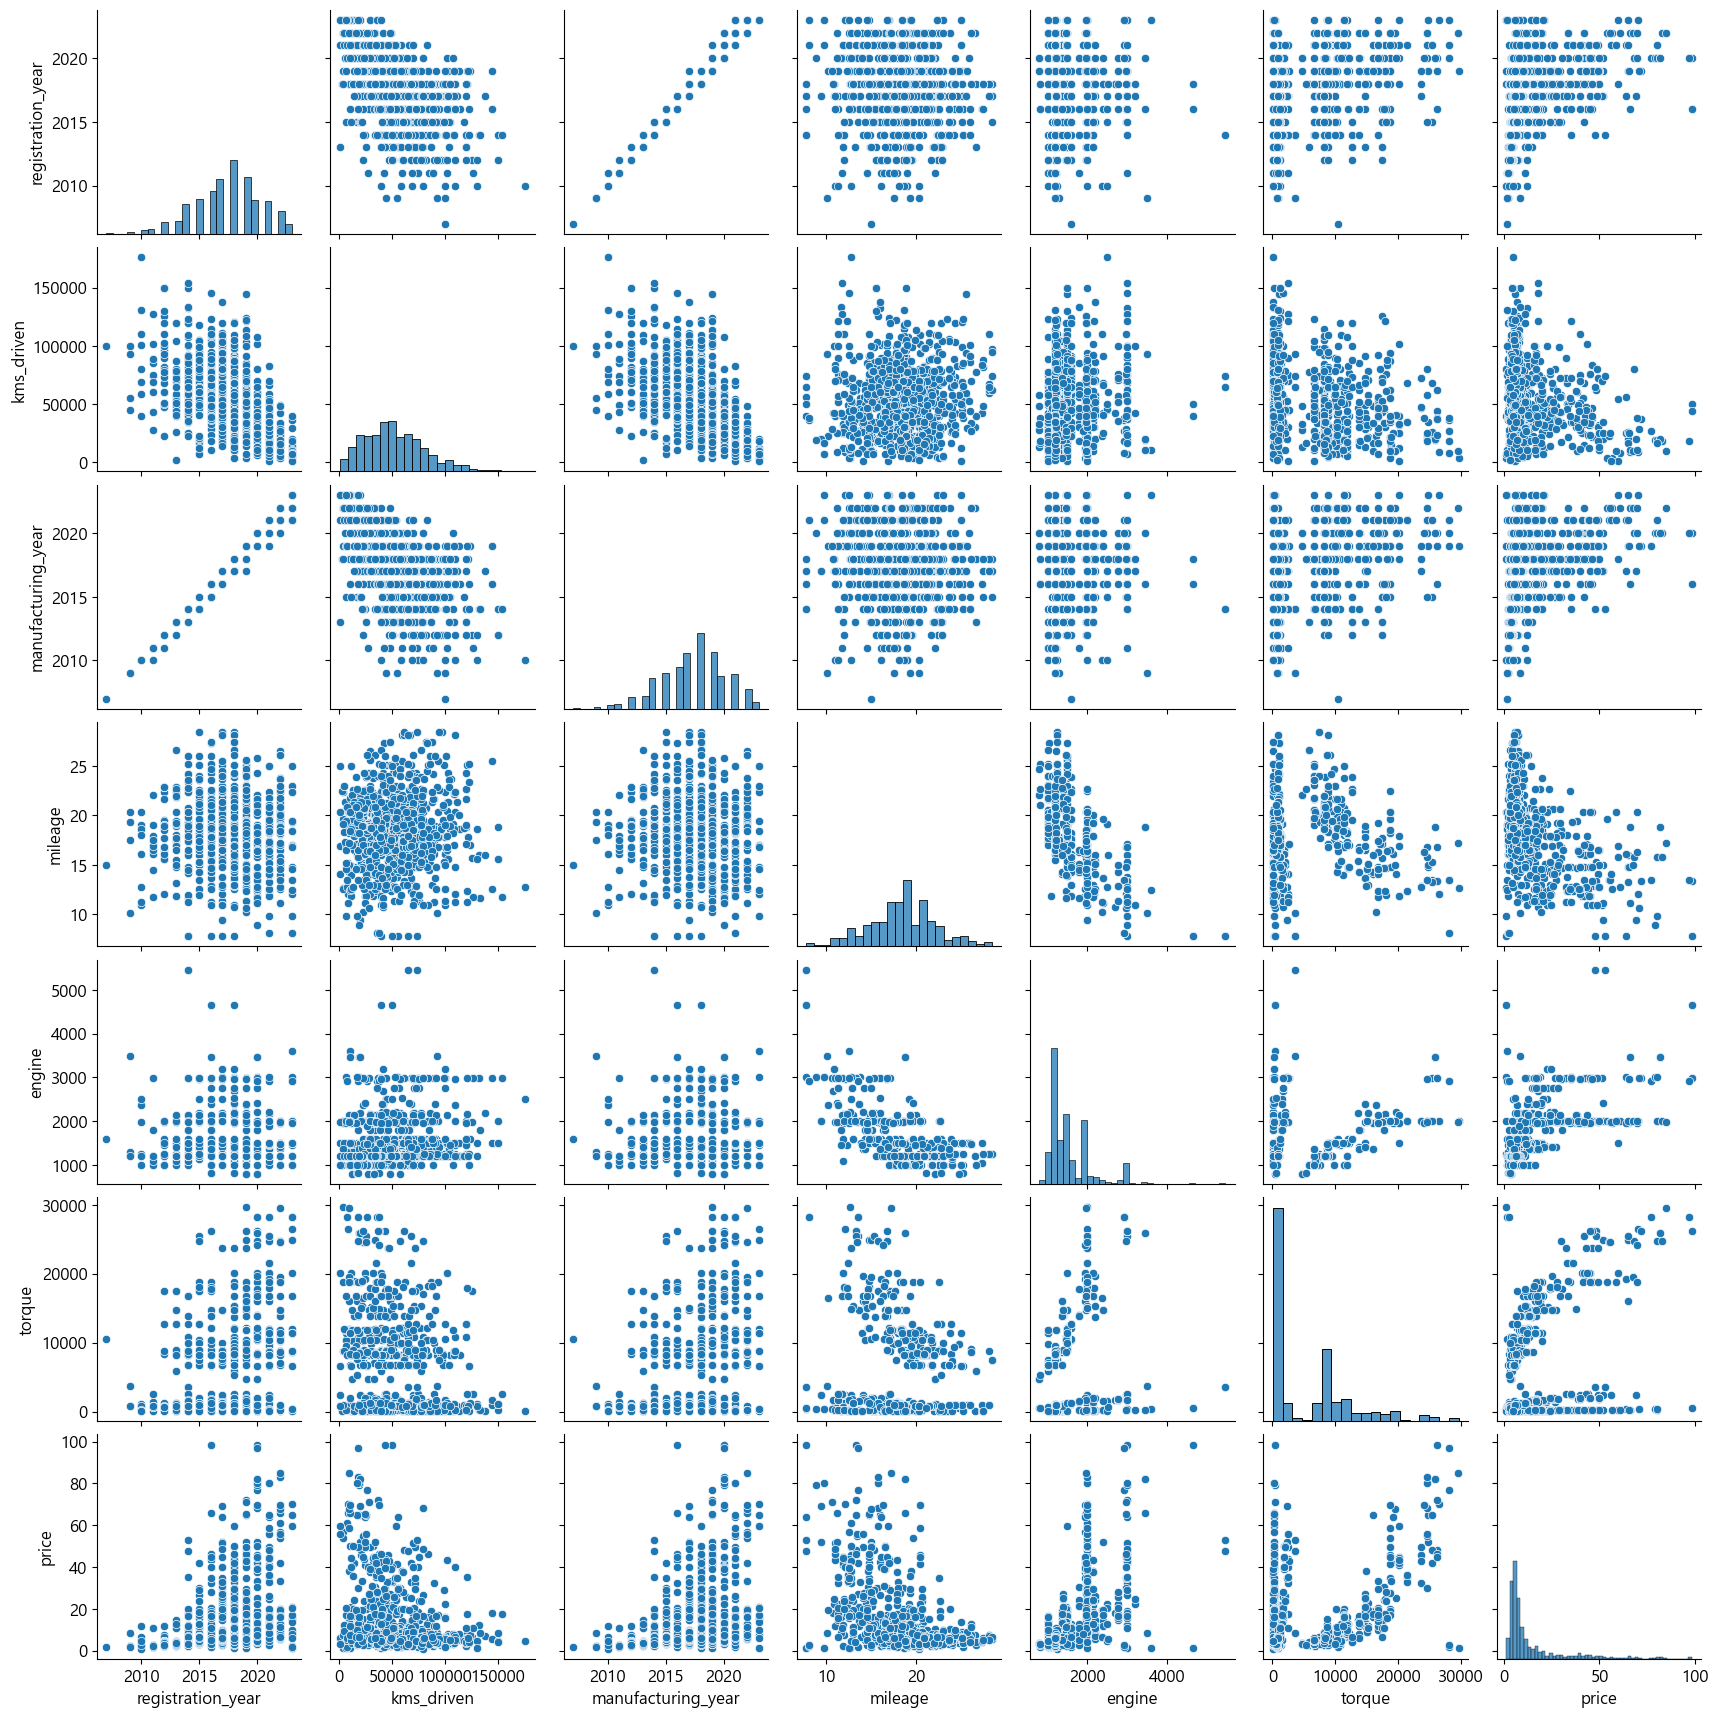

In [43]:
sb.pairplot(df)
plt.show()

- ÏùºÎ∂Ä ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàòÎäî ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÍ≥† ÏûàÏùå
  - ÎèÖÎ¶ΩÎ≥ÄÏàòÎÅºÎ¶¨ Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÍ≥† ÏûàÎäî Í≤ΩÏö∞ÎèÑ ÏûàÏñ¥ Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î∞©ÏßÄÎ•º ÏúÑÌï¥ ÏùºÎ∂Ä Ïó¥ÏùÑ Ï†úÍ±∞Ìï† ÌïÑÏöîÏÑ±Ïù¥ ÏûàÏùå

#### Ï¢ÖÏÜçÎ≥ÄÏàò Î∂ÑÌè¨ ÌôïÏù∏
- Îç∞Ïù¥ÌÑ∞Îäî 1094Í∞úÎ°ú, ÌûàÏä§ÌÜ†Í∑∏Îû® Íµ¨Í∞Ñ ÏàòÎäî 11~13Í∞úÎ°ú ÏÑ§Ï†ï (12Í∞ú)

In [44]:
X = df.copy()
Y = X.pop('price')

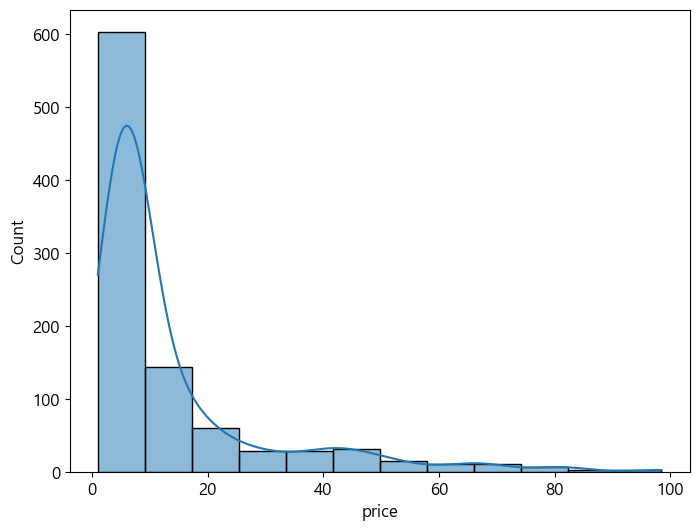

In [45]:
plt.figure()
sb.histplot(data = Y, kde = True, bins = 12)
plt.show()

- Ï¢ÖÏÜçÎ≥ÄÏàò Î∂ÑÌè¨Îäî Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥ÏßÄ ÏïäÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ

#### Ïó∞ÏÜçÌòï ÎèÖÎ¶ΩÎ≥ÄÏàò Î∂ÑÌè¨ ÌôïÏù∏

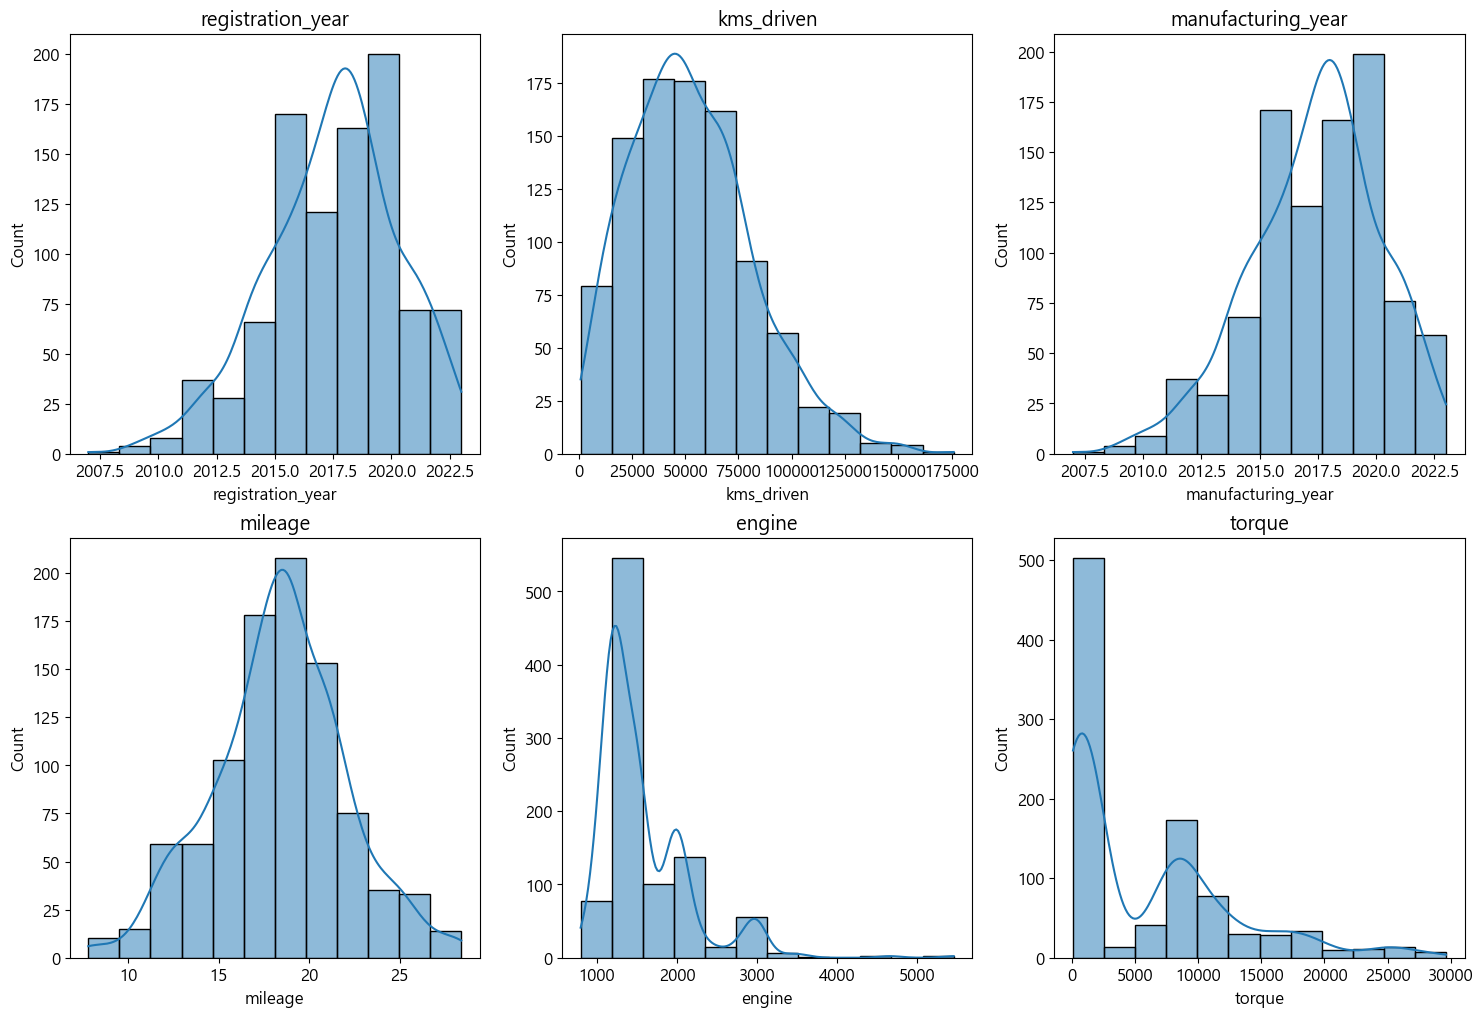

In [46]:
fig, ax = plt.subplots(2, 3, figsize = (18, 12))
ax = ax.flatten()
tmp = X.select_dtypes('number')

for i, v in enumerate(tmp.columns):
    sb.histplot(data = X[v], bins = 12, ax = ax[i], kde = True)
    ax[i].set_title(v)
plt.show()

#### Î∂ÑÏÇ∞Î∂ÑÏÑù

In [47]:
col_o = X.select_dtypes(['object', 'category']).columns

In [48]:
for c in col_o:
    tmp = df[[c, 'price']]
    my_anova(tmp, hue=c, target='price')

pingouin.anova
+----+--------------------+--------+------+---------+--------+------------+-----------+
|    | Source             |     SS |   DF |      MS |      F |      p-unc |       np2 |
|----+--------------------+--------+------+---------+--------+------------+-----------|
|  0 | insurance_validity | 3977.1 |    4 | 994.275 | 3.9321 | 0.00358262 | 0.0165088 |
|  1 | Within             | 236931 |  937 | 252.861 |    nan |        nan |       nan |
+----+--------------------+--------+------+---------+--------+------------+-----------+

statsmodels.anova.anova_lm
+-----------------------+------+----------+-----------+--------+------------+
|                       |   df |   sum_sq |   mean_sq |      F |     PR(>F) |
|-----------------------+------+----------+-----------+--------+------------|
| C(insurance_validity) |    4 |   3977.1 |   994.275 | 3.9321 | 0.00358262 |
| Residual              |  937 |   236931 |   252.861 |    nan |        nan |
+-----------------------+------+-------

#### Î™ÖÎ™©Ìòï Îç∞Ïù¥ÌÑ∞ / Ï¢ÖÏÜçÎ≥ÄÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏóê ÎåÄÌïú ÏãúÍ∞ÅÌôî

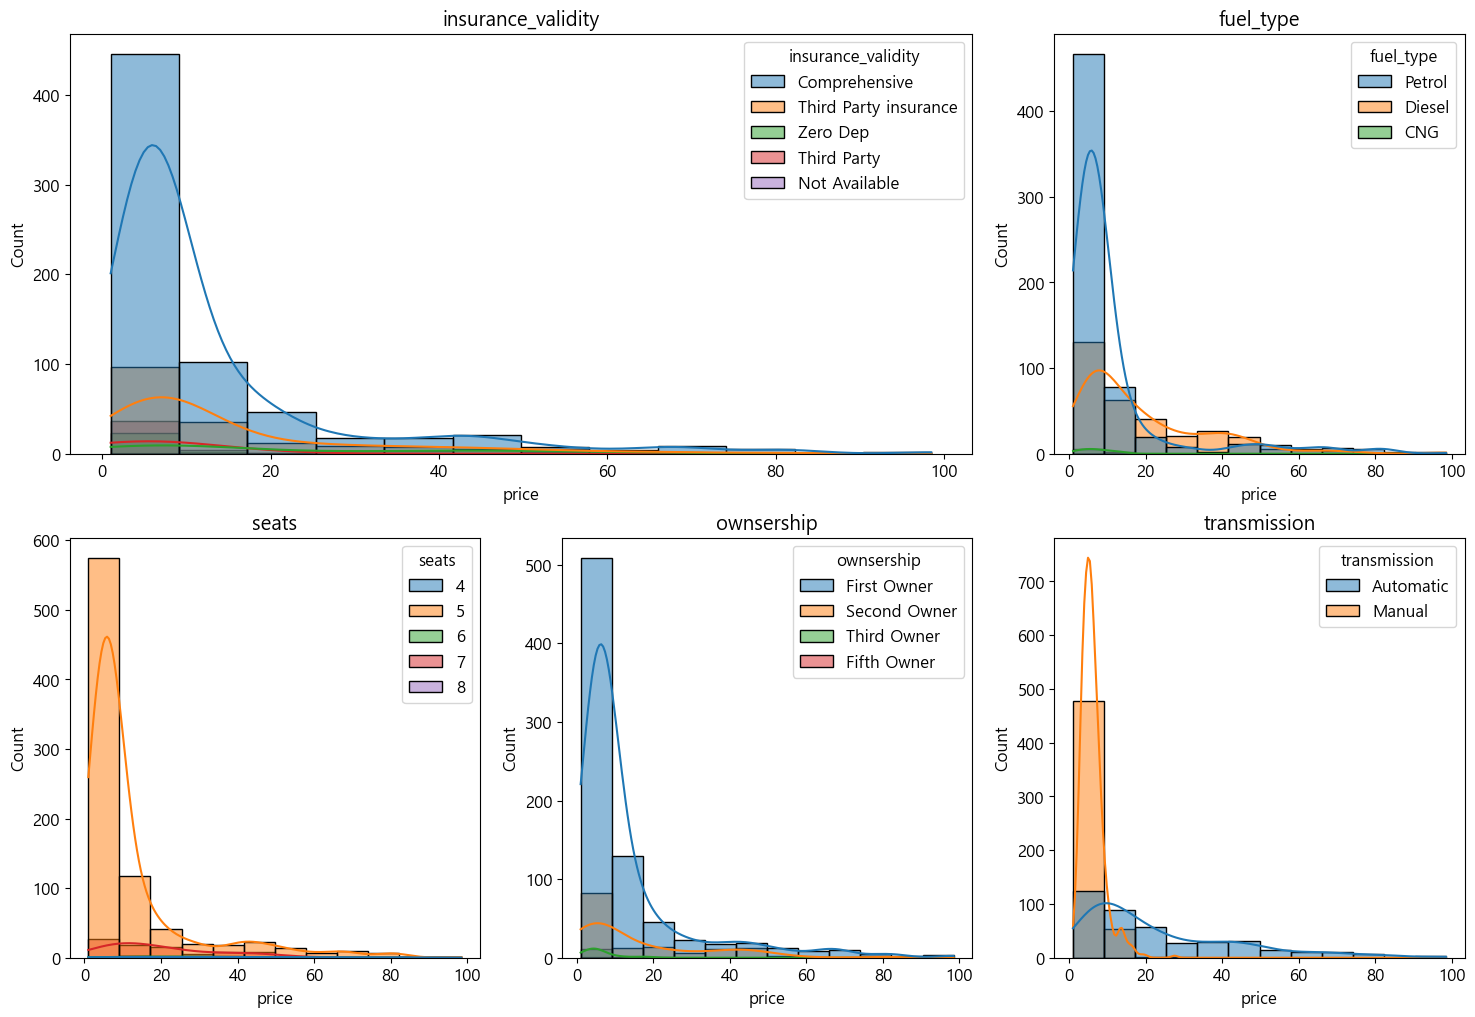

In [49]:
fig = plt.figure(figsize = (18, 12))
gs = GridSpec(2, 3)
ax0 = fig.add_subplot(gs[0, :2])
ax1 = fig.add_subplot(gs[0, 2])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
axs = [ax0, ax1, ax2, ax3, ax4]

for i, v in enumerate(col_o):
    sb.histplot(data = df, x = 'price', hue = v, bins = 12, ax = axs[i], kde = True)
    axs[i].set_title(v)

plt.show()

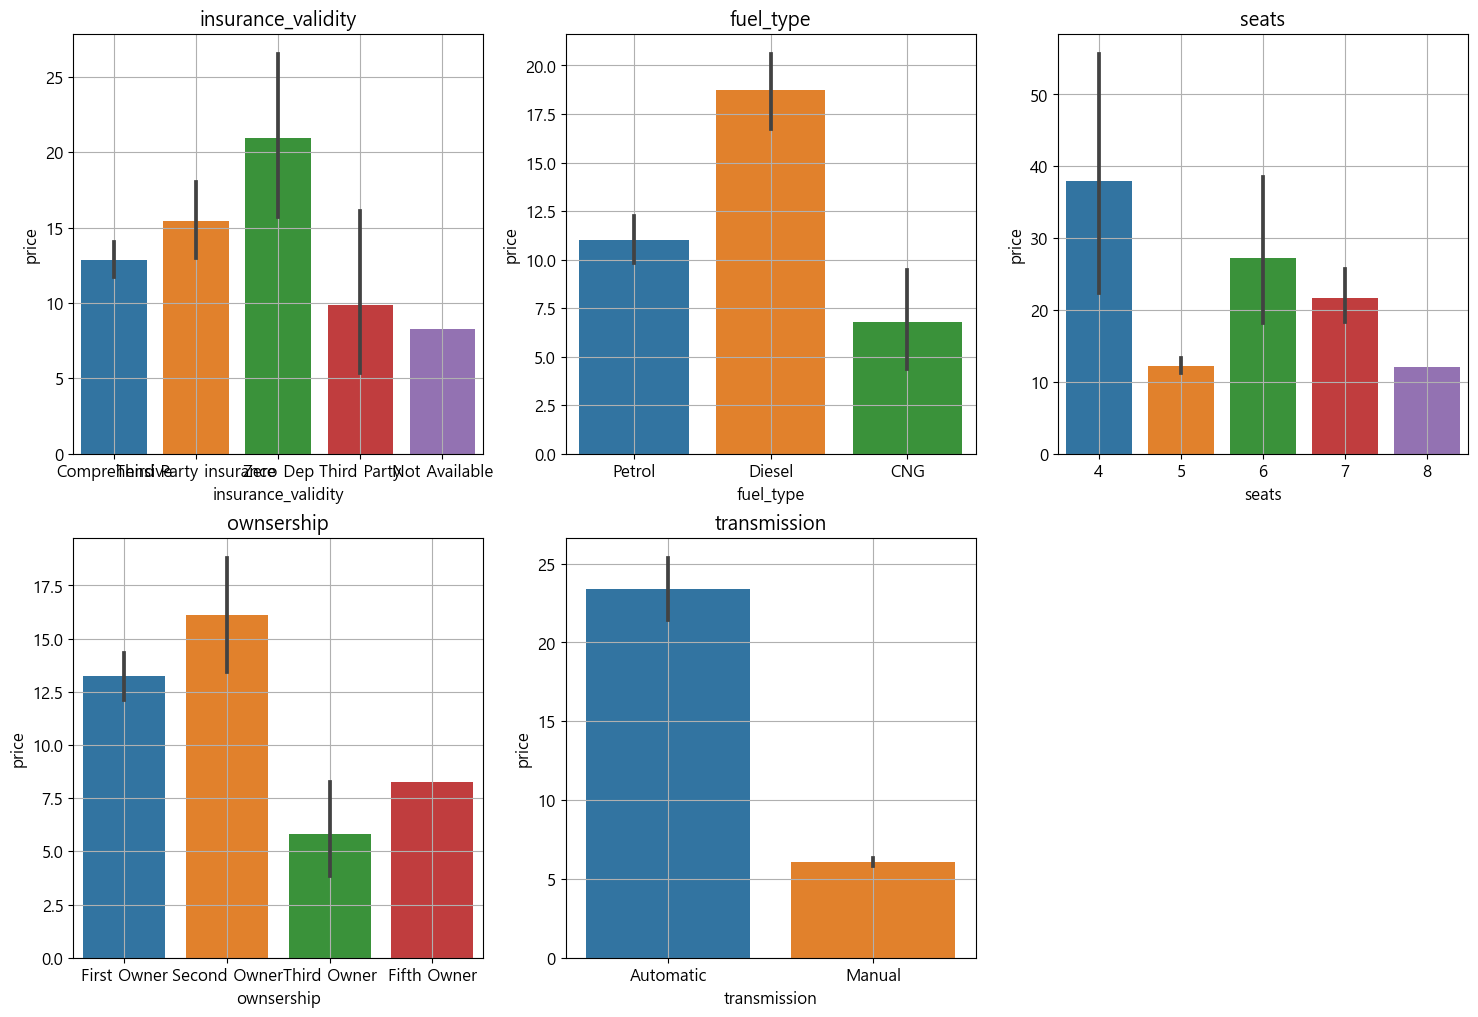

In [50]:
fig, ax = plt.subplots(2, 3, figsize = (18, 12))
ax = ax.flatten()

for i, v in enumerate(col_o):
    sb.barplot(data = df, x = v, y = 'price', ax = ax[i])
    ax[i].set_title(v)
    ax[i].grid()
ax[5].set_visible(False)
plt.show()

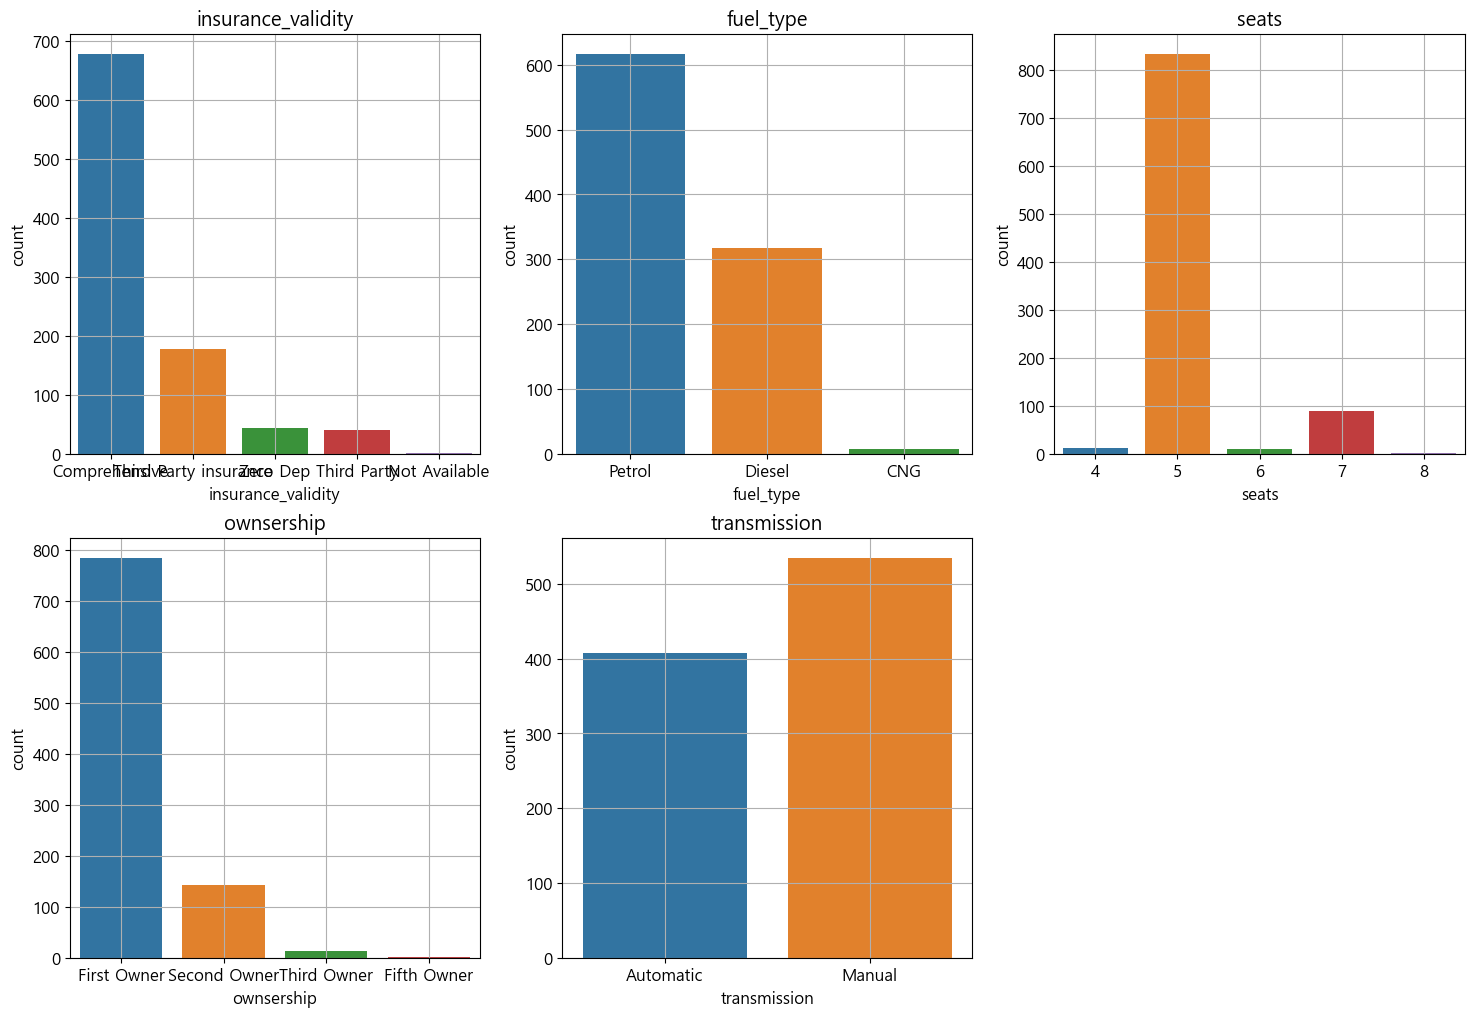

In [51]:
fig, ax = plt.subplots(2, 3, figsize = (18, 12))
ax = ax.flatten()

for i, v in enumerate(col_o):
    sb.countplot(data = df, x = v, ax = ax[i])
    ax[i].set_title(v)
    ax[i].grid()
ax[5].set_visible(False)
plt.show()

- transmission Ïó¥ÏùÄ Ï¢ÖÏÜçÎ≥ÄÏàò ÏòàÏ∏°Ïóê Îß§Ïö∞ Ïú†ÏùòÎØ∏Ìïú Î≥ÄÏàòÍ∞Ä Îê† Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎê®

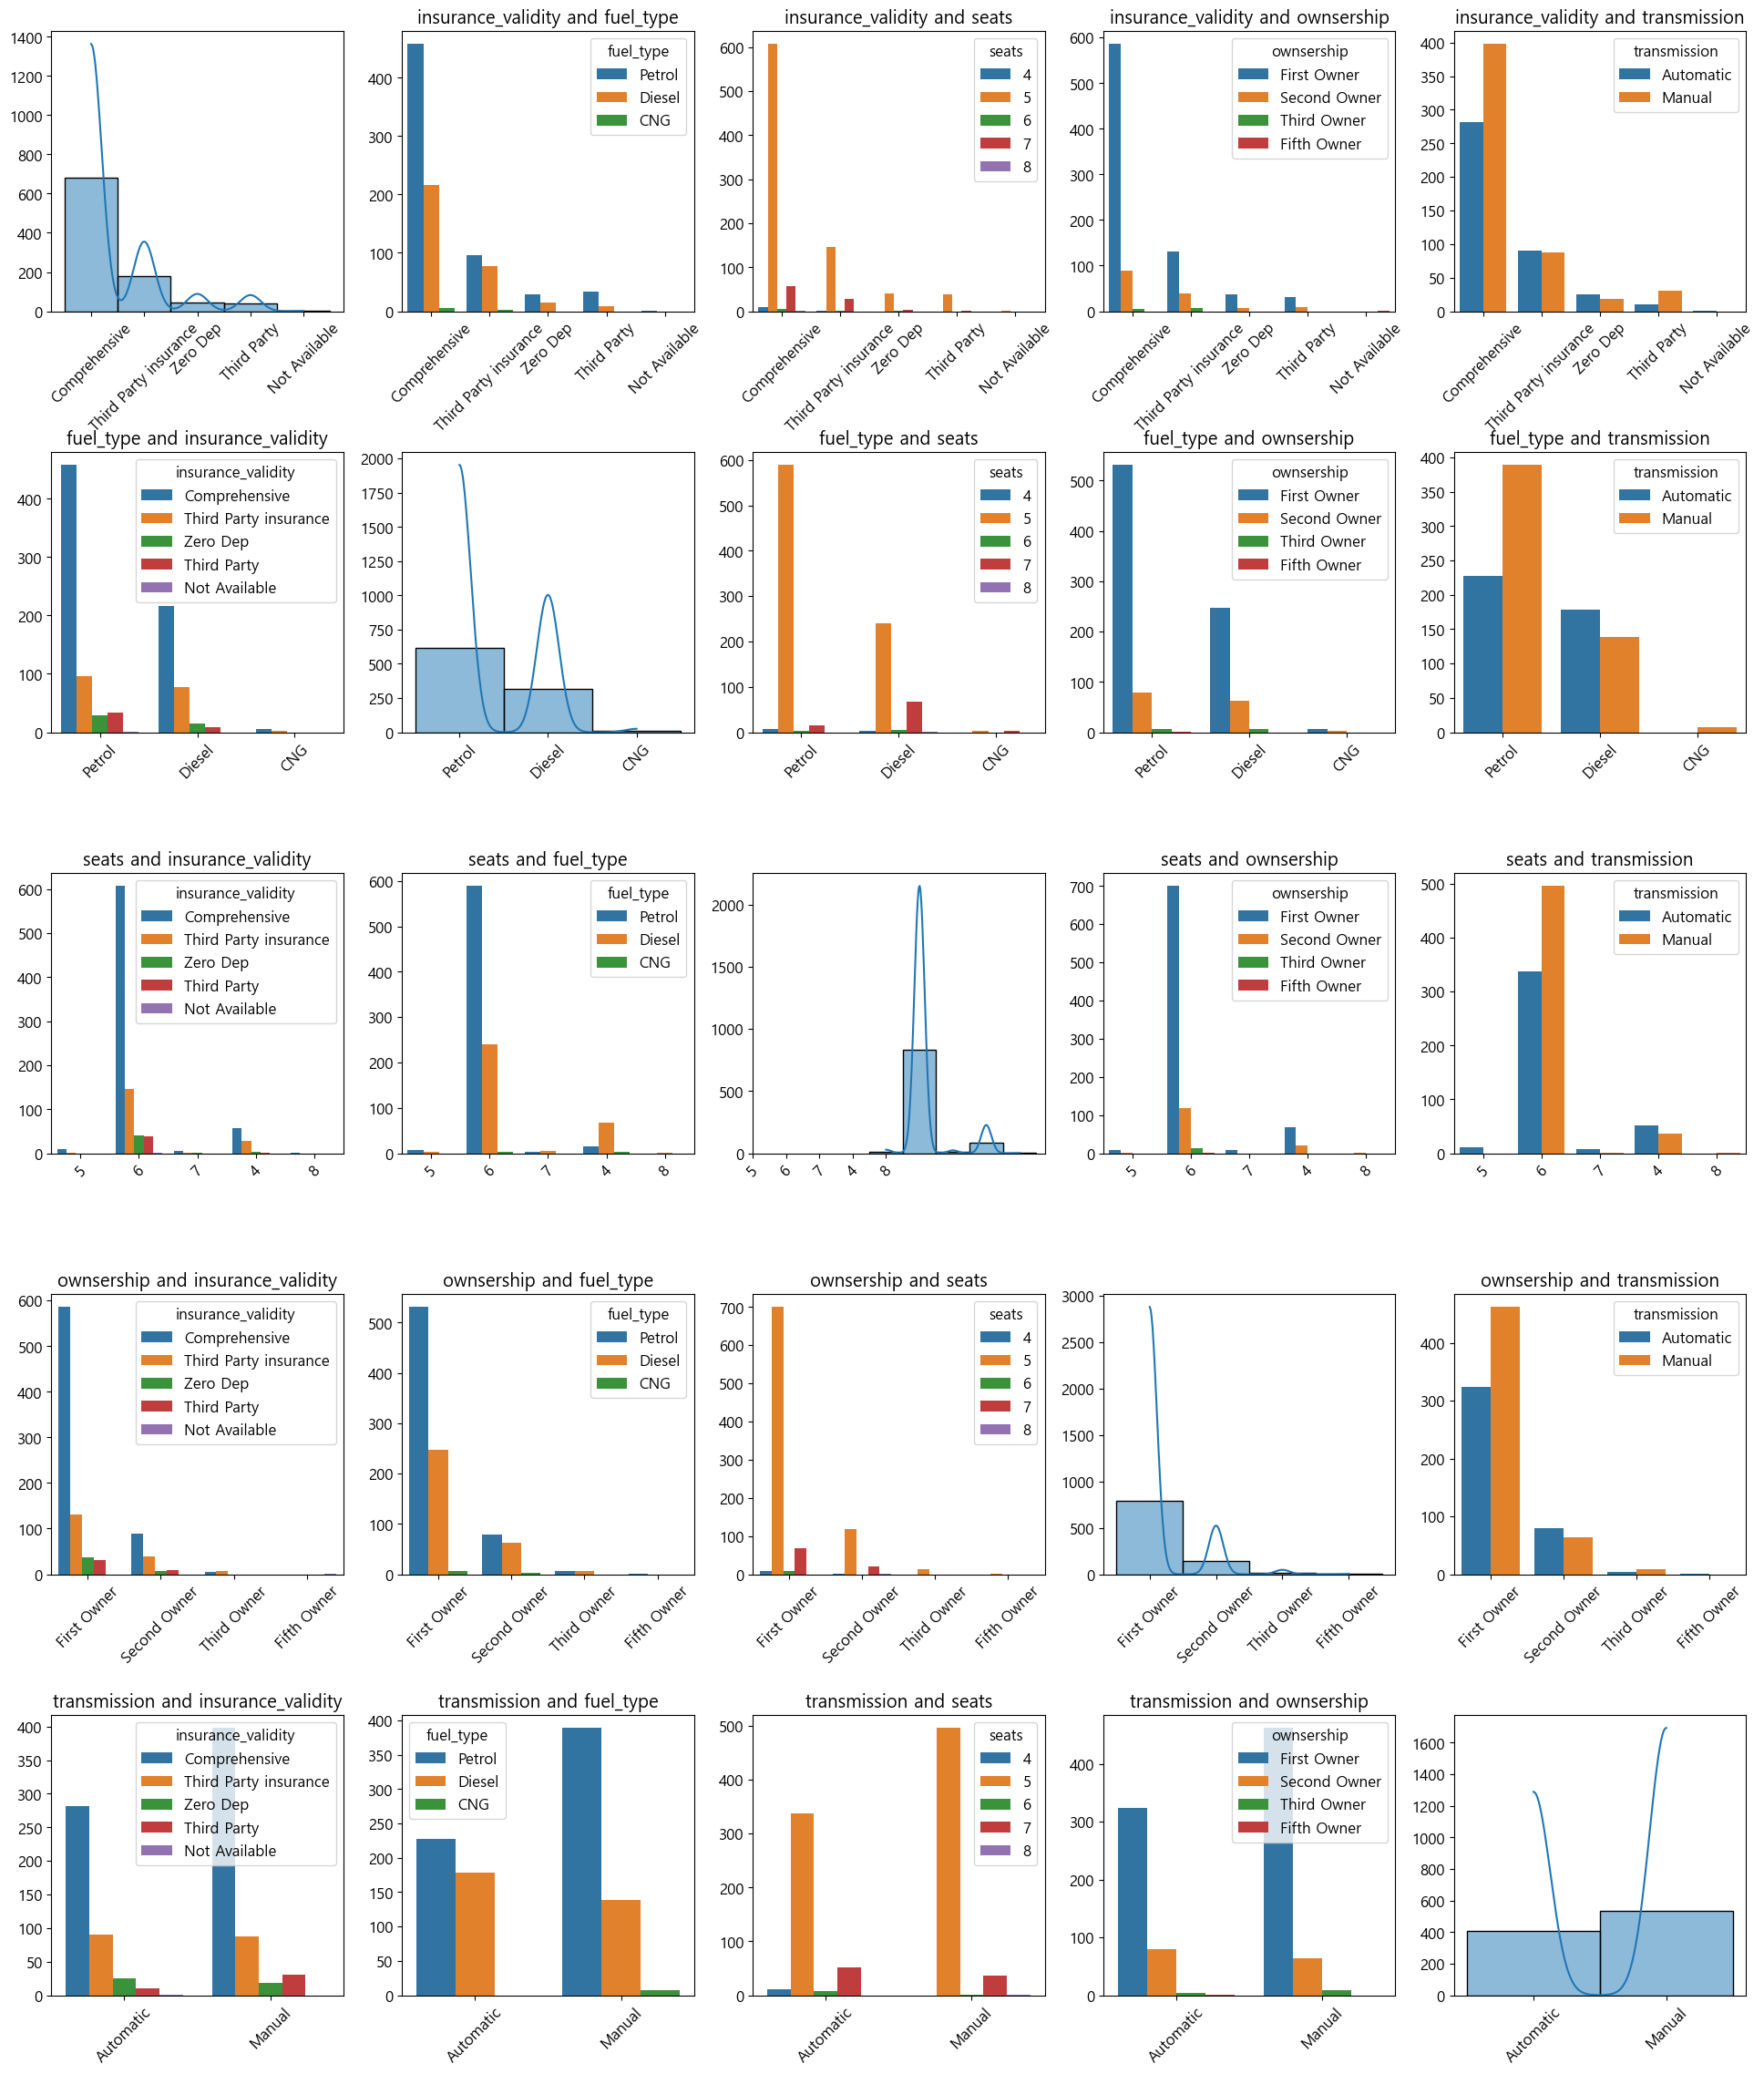

In [52]:
fig, ax = plt.subplots(len(col_o), len(col_o), figsize = (24, 28))
fig.subplots_adjust(hspace = 0.5)

for i, v in enumerate(col_o):
    for j, w in enumerate(col_o):
        if i == j:
            sb.histplot(data = df, x = v, ax = ax[i, j], kde = True, bins = 12)
            ax[i, j].set_xticks(range(0, len(df[v].unique())), df[v].unique(), rotation = 45)
            ax[i, j].set_xlabel("")
            ax[i, j].set_ylabel("")
        else:
            sb.countplot(data = df, x = v, hue = w, ax = ax[i, j])
            ax[i, j].set_title(f"{v} and {w}")
            ax[i, j].set_xticks(range(0, len(df[v].unique())), df[v].unique(), rotation = 45)
            ax[i, j].set_xlabel("")
            ax[i, j].set_ylabel("")

plt.show()

#### ÏÉÅÍ¥ÄÍ≥ÑÏàò ÏãúÍ∞ÅÌôî

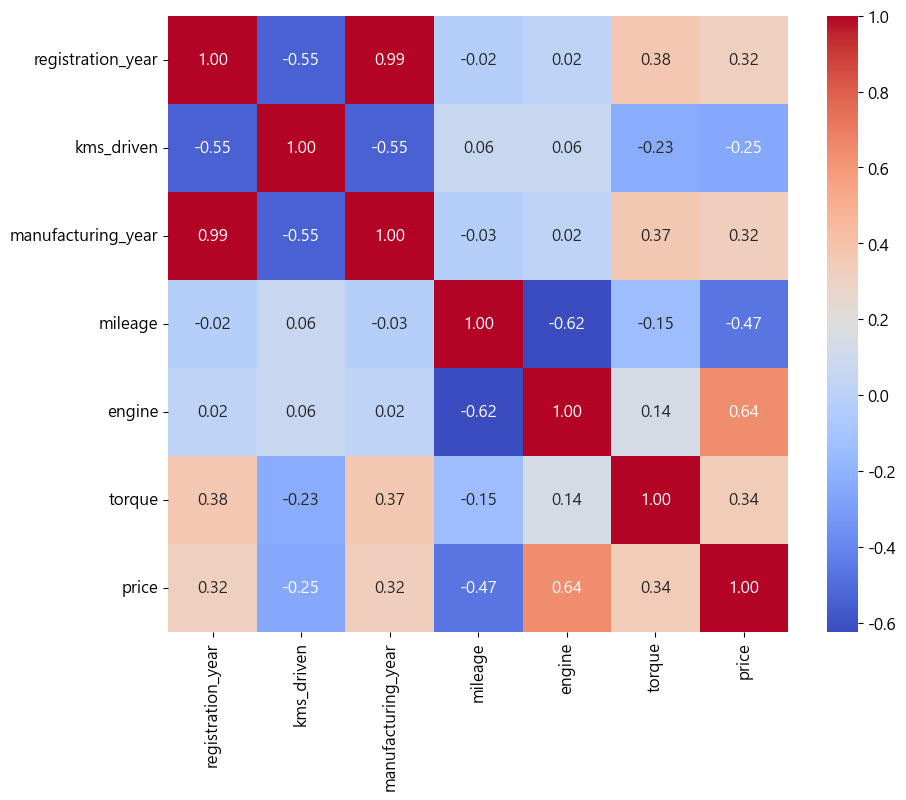

+---------------------------------------------+---------------+--------------+----------+
|                                             |   correlation |      p-value | result   |
|---------------------------------------------+---------------+--------------+----------|
| ('registration_year', 'kms_driven')         |     -0.546776 |  1.49376e-74 | True     |
| ('registration_year', 'manufacturing_year') |      0.994491 |            0 | True     |
| ('registration_year', 'mileage')            |    -0.0245842 |      0.45106 | False    |
| ('registration_year', 'engine')             |     0.0192851 |     0.554408 | False    |
| ('registration_year', 'torque')             |      0.376471 |    4.365e-33 | True     |
| ('registration_year', 'price')              |      0.319956 |  7.27025e-24 | True     |
| ('kms_driven', 'registration_year')         |     -0.546776 |  1.49376e-74 | True     |
| ('kms_driven', 'manufacturing_year')        |      -0.54704 |  1.23044e-74 | True     |
| ('kms_dr

In [53]:
my_correlation(data = df.select_dtypes('number'), dpi = 100)

- manufacturing_yearÍ≥º registration_yearÎäî Îß§Ïö∞ Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù¥Í≥† ÏûàÎã§
  - Í∑∏ Ïô∏ ÎèÖÎ¶ΩÎ≥ÄÏàò ÎÅºÎ¶¨ÎèÑ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Ïñ¥ÎäêÏ†ïÎèÑ ÏûàÏùå

### ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ±

In [54]:
results = []

def add_result(model, note, x_test, y_test):
    global results
    tmp_dict = {}
    tmp_dict['How'] = note
    tmp_dict['R2_Score'] = model.score(x_test, y_test)
    tmp_dict['MAE'] = mean_absolute_error(y_test, model.predict(x_test))
    tmp_dict['RMSE'] = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
    tmp_dict['model'] = model
    results.append(tmp_dict)

In [55]:
pp = YjkPreprocessor()
pp.set_strategy(outline = None, null = None)

ÏïÑÎûòÏôÄ Í∞ôÏù¥ Ï≤òÎ¶¨Ìï©ÎãàÎã§.
+-------------+---------------+
| Î≤îÏ£º        | Ï≤òÎ¶¨Î∞©Î≤ï      |
|-------------+---------------|
| Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ | Ï≤òÎ¶¨ÌïòÏßÄ ÏïäÏùå |
| Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ | Ï≤òÎ¶¨ÌïòÏßÄ ÏïäÏùå |
| Ïä§ÏºÄÏùºÎü¨    | ÌëúÏ§ÄÌôî        |
| Ïù∏ÏΩîÎî©      | ÏõêÌï´Ïù∏ÏΩîÎî©    |
+-------------+---------------+


In [56]:
X_p = pp.fit_transform(X)
X_p.head()

Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞ : (942, 11)
Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Í≤∞Ï∏°ÏπòÎäî ÏóÜÏäµÎãàÎã§.
Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº : ['registration_year', 'kms_driven', 'manufacturing_year', 'mileage', 'engine', 'torque'], Ï¥ù 6Í∞ú
Î™ÖÎ™©Ìòï Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº : ['insurance_validity', 'fuel_type', 'seats', 'ownsership', 'transmission'], Ï¥ù 5Í∞ú


registration_year  kms_driven  manufacturing_year   mileage    engine  \
0          -0.171223    0.110225           -0.144767 -2.870592  2.525913   
1           1.243623   -0.769948            0.929018 -0.265857 -1.017130   
2           0.182488   -0.999310            0.213161  0.625022  0.749956   
3           0.536200   -1.194241            0.571089 -0.510306 -0.389070   
4           0.536200   -0.274645            0.571089 -1.007351  0.400442   

     torque  insurance_validity_Comprehensive  \
0 -0.834863                               1.0   
1  0.596455                               1.0   
2 -0.856641                               1.0   
3  1.188957                               1.0   
4  1.780408                               1.0   

   insurance_validity_Not Available  insurance_validity_Third Party  \
0                               0.0                             0.0   
1                               0.0                             0.0   
2                               0.0                             0.0   
3                               0.0                             0.0   
4                               0.0                             0.0   

   insurance_validity_Third Party insurance  ...  seats_5  seats_6  seats_7  \
0                                       0.0  ...      1.0      0.0      0.0   
1                                       0.0  ...      1.0      0.0      0.0   
2                                       0.0  ...      1.0      0.0      0.0   
3                                       0.0  ...      1.0      0.0      0.0   
4                                       0.0  ...      1.0      0.0      0.0   

   seats_8  ownsership_Fifth Owner  ownsership_First Owner  \
0      0.0                     0.0                     1.0   
1      0.0                     0.0                     1.0   
2      0.0                     0.0                     1.0   
3      0.0                     0.0                     1.0   
4      0.0                     0.0                     1.0   

   ownsership_Second Owner  ownsership_Third Owner  transmission_Automatic  \
0                      0.0                     0.0                     1.0   
1                      0.0                     0.0                     1.0   
2                      0.0                     0.0                     1.0   
3                      0.0                     0.0                     0.0   
4                      0.0                     0.0                     1.0   

   transmission_Manual  
0                  0.0  
1                  0.0  
2                  0.0  
3                  1.0  
4                  0.0  

[5 rows x 25 columns]

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.25, random_state = 0)

In [58]:
model = my_linear_regression(x_train, y_train, x_test, y_test, use_plot = False, report = False)
add_result(model, 'Í∏∞Î≥∏ Îç∞Ïù¥ÌÑ∞', x_test, y_test)

[ÌöåÍ∑ÄÏãù]
price = -2.227 * registration_year + -2.545 * kms_driven + 3.958 * manufacturing_year + -0.620 * mileage + 8.186 * engine + 1.755 * torque + 1.139 * insurance_validity_Comprehensive + -11.753 * insurance_validity_Not Available + 2.333 * insurance_validity_Third Party + 1.595 * insurance_validity_Third Party insurance + 6.686 * insurance_validity_Zero Dep + 1.427 * fuel_type_CNG + -0.630 * fuel_type_Diesel + -0.797 * fuel_type_Petrol + 3.393 * seats_4 + 1.309 * seats_5 + 5.243 * seats_6 + -0.520 * seats_7 + -9.425 * seats_8 + -11.753 * ownsership_Fifth Owner + 3.403 * ownsership_First Owner + 4.714 * ownsership_Second Owner + 3.636 * ownsership_Third Owner + 2.939 * transmission_Automatic + -2.939 * transmission_Manual + 8.284

[ÌöåÍ∑ÄÎ∂ÑÏÑù ÏÑ±Îä•ÌèâÍ∞Ä]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   Í≤∞Ï†ïÍ≥ÑÏàò(R2) |   ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®(MAE) |   ÌèâÍ∑†Ï†úÍ≥±

### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨(2)

#### Torque Binning
- TorqueÍ∞Ä ÏùºÏ†ï ÏàòÏπò Ïù¥ÌïòÏùº Í≤ΩÏö∞ priceÍ∞Ä ÎÇÆÍ≤å ÌòïÏÑ±ÎêòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏùå
  - Ìï¥Îãπ Í∏∞Ï§ÄÏúºÎ°ú Î™ÖÎ™©Ìòï Î≥ÄÏàòÎ•º ÏÉùÏÑ±ÌïòÏó¨ Î∂ÑÏÑùÎ™®Îç∏Ïóê Ï∂îÍ∞Ä

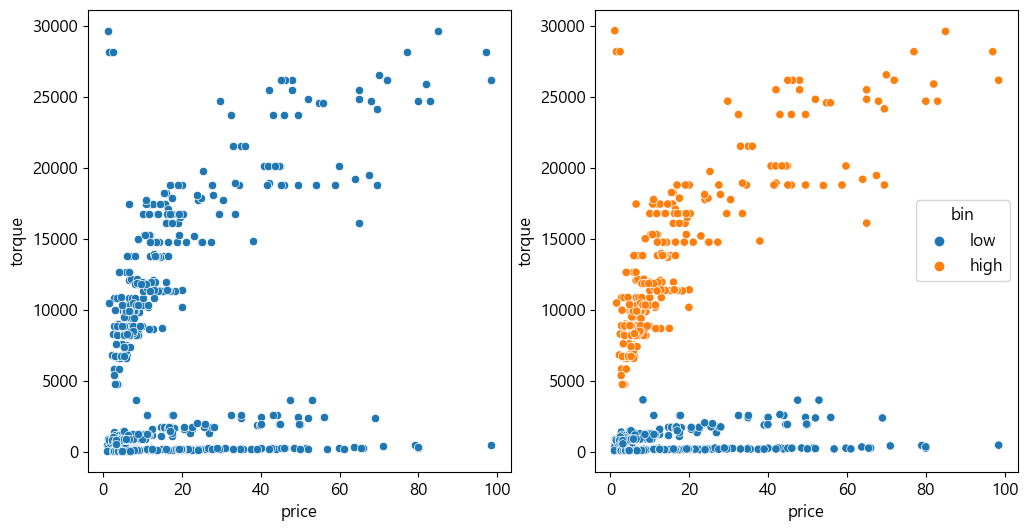

In [59]:
tor = df[['torque', 'price']]
tor['bin'] = tor['torque'].apply(lambda x : 'high' if x > 4500 else 'low')


fig, ax = plt.subplots(1, 2, figsize = (12, 6))
sb.scatterplot(y = X['torque'], x = Y, ax = ax[0])
sb.scatterplot(data = tor, y = 'torque', x = 'price', hue = 'bin')
plt.show()

- torque 4500ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Î∂ÑÌï†
- Ïù¥ÌõÑ ÌöåÍ∑ÄÎ∂ÑÏÑù Ïã§Ìñâ

In [60]:
X['torque_bin'] = X['torque'].apply(lambda x : 'high' if x > 4500 else 'low')

In [61]:
X['torque_bin'].value_counts()

low     513
high    429
Name: torque_bin, dtype: int64

In [62]:
X_p = pp.fit_transform(X)
X_p.head()

Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞ : (942, 12)
Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Í≤∞Ï∏°ÏπòÎäî ÏóÜÏäµÎãàÎã§.
Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº : ['registration_year', 'kms_driven', 'manufacturing_year', 'mileage', 'engine', 'torque'], Ï¥ù 6Í∞ú
Î™ÖÎ™©Ìòï Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº : ['insurance_validity', 'fuel_type', 'seats', 'ownsership', 'transmission', 'torque_bin'], Ï¥ù 6Í∞ú


registration_year  kms_driven  manufacturing_year   mileage    engine  \
0          -0.171223    0.110225           -0.144767 -2.870592  2.525913   
1           1.243623   -0.769948            0.929018 -0.265857 -1.017130   
2           0.182488   -0.999310            0.213161  0.625022  0.749956   
3           0.536200   -1.194241            0.571089 -0.510306 -0.389070   
4           0.536200   -0.274645            0.571089 -1.007351  0.400442   

     torque  insurance_validity_Comprehensive  \
0 -0.834863                               1.0   
1  0.596455                               1.0   
2 -0.856641                               1.0   
3  1.188957                               1.0   
4  1.780408                               1.0   

   insurance_validity_Not Available  insurance_validity_Third Party  \
0                               0.0                             0.0   
1                               0.0                             0.0   
2                               0.0                             0.0   
3                               0.0                             0.0   
4                               0.0                             0.0   

   insurance_validity_Third Party insurance  ...  seats_7  seats_8  \
0                                       0.0  ...      0.0      0.0   
1                                       0.0  ...      0.0      0.0   
2                                       0.0  ...      0.0      0.0   
3                                       0.0  ...      0.0      0.0   
4                                       0.0  ...      0.0      0.0   

   ownsership_Fifth Owner  ownsership_First Owner  ownsership_Second Owner  \
0                     0.0                     1.0                      0.0   
1                     0.0                     1.0                      0.0   
2                     0.0                     1.0                      0.0   
3                     0.0                     1.0                      0.0   
4                     0.0                     1.0                      0.0   

   ownsership_Third Owner  transmission_Automatic  transmission_Manual  \
0                     0.0                     1.0                  0.0   
1                     0.0                     1.0                  0.0   
2                     0.0                     1.0                  0.0   
3                     0.0                     0.0                  1.0   
4                     0.0                     1.0                  0.0   

   torque_bin_high  torque_bin_low  
0              0.0             1.0  
1              1.0             0.0  
2              0.0             1.0  
3              1.0             0.0  
4              1.0             0.0  

[5 rows x 27 columns]

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.25, random_state = 0)
model = my_linear_regression(x_train, y_train, x_test, y_test, use_plot = False, report = False)
add_result(model, 'Binning', x_test, y_test)

[ÌöåÍ∑ÄÏãù]
price = -5.179 * registration_year + -2.470 * kms_driven + 7.382 * manufacturing_year + 0.413 * mileage + 7.494 * engine + 7.371 * torque + 0.810 * insurance_validity_Comprehensive + -10.915 * insurance_validity_Not Available + 2.727 * insurance_validity_Third Party + 1.129 * insurance_validity_Third Party insurance + 6.250 * insurance_validity_Zero Dep + 1.141 * fuel_type_CNG + -1.113 * fuel_type_Diesel + -0.028 * fuel_type_Petrol + 3.190 * seats_4 + 1.038 * seats_5 + 3.585 * seats_6 + -0.004 * seats_7 + -7.809 * seats_8 + -10.915 * ownsership_Fifth Owner + 3.194 * ownsership_First Owner + 5.065 * ownsership_Second Owner + 2.656 * ownsership_Third Owner + 2.484 * transmission_Automatic + -2.484 * transmission_Manual + -6.437 * torque_bin_high + 6.437 * torque_bin_low + 8.037

[ÌöåÍ∑ÄÎ∂ÑÏÑù ÏÑ±Îä•ÌèâÍ∞Ä]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   Í≤∞Ï†ïÍ≥ÑÏ

#### Î™ÖÎ™©Ìòï Î≥ÄÏàò Ï°∞Ìï©
- ÍµêÌö®ÏûëÏö©Ïù¥ ÏûàÏùÑ Ïàò ÏûàÎäî fuel_typeÍ≥º transmissionÏùÑ Í≤∞Ìï©Ìïú ÏÉàÎ°úÏö¥ Î™ÖÎ™©Ìòï Î≥ÄÏàò ÏÉùÏÑ±

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   registration_year   942 non-null    int32   
 1   insurance_validity  942 non-null    object  
 2   fuel_type           942 non-null    object  
 3   seats               942 non-null    category
 4   kms_driven          942 non-null    int64   
 5   ownsership          942 non-null    object  
 6   transmission        942 non-null    object  
 7   manufacturing_year  942 non-null    int32   
 8   mileage             942 non-null    float64 
 9   engine              942 non-null    float64 
 10  torque              942 non-null    float64 
 11  torque_bin          942 non-null    object  
dtypes: category(1), float64(3), int32(2), int64(1), object(5)
memory usage: 74.8+ KB


In [65]:
X['fuel_trans'] = X['fuel_type'] + "_" + X['transmission']

In [66]:
X['fuel_trans'].value_counts()

Petrol_Manual       389
Petrol_Automatic    228
Diesel_Automatic    179
Diesel_Manual       138
CNG_Manual            8
Name: fuel_trans, dtype: int64

In [67]:
X_p = pp.fit_transform(X)
X_p.head()

Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞ : (942, 13)
Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Í≤∞Ï∏°ÏπòÎäî ÏóÜÏäµÎãàÎã§.
Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº : ['registration_year', 'kms_driven', 'manufacturing_year', 'mileage', 'engine', 'torque'], Ï¥ù 6Í∞ú
Î™ÖÎ™©Ìòï Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº : ['insurance_validity', 'fuel_type', 'seats', 'ownsership', 'transmission', 'torque_bin', 'fuel_trans'], Ï¥ù 7Í∞ú


registration_year  kms_driven  manufacturing_year   mileage    engine  \
0          -0.171223    0.110225           -0.144767 -2.870592  2.525913   
1           1.243623   -0.769948            0.929018 -0.265857 -1.017130   
2           0.182488   -0.999310            0.213161  0.625022  0.749956   
3           0.536200   -1.194241            0.571089 -0.510306 -0.389070   
4           0.536200   -0.274645            0.571089 -1.007351  0.400442   

     torque  insurance_validity_Comprehensive  \
0 -0.834863                               1.0   
1  0.596455                               1.0   
2 -0.856641                               1.0   
3  1.188957                               1.0   
4  1.780408                               1.0   

   insurance_validity_Not Available  insurance_validity_Third Party  \
0                               0.0                             0.0   
1                               0.0                             0.0   
2                               0.0                             0.0   
3                               0.0                             0.0   
4                               0.0                             0.0   

   insurance_validity_Third Party insurance  ...  ownsership_Third Owner  \
0                                       0.0  ...                     0.0   
1                                       0.0  ...                     0.0   
2                                       0.0  ...                     0.0   
3                                       0.0  ...                     0.0   
4                                       0.0  ...                     0.0   

   transmission_Automatic  transmission_Manual  torque_bin_high  \
0                     1.0                  0.0              0.0   
1                     1.0                  0.0              1.0   
2                     1.0                  0.0              0.0   
3                     0.0                  1.0              1.0   
4                     1.0                  0.0              1.0   

   torque_bin_low  fuel_trans_CNG_Manual  fuel_trans_Diesel_Automatic  \
0             1.0                    0.0                          0.0   
1             0.0                    0.0                          0.0   
2             1.0                    0.0                          1.0   
3             0.0                    0.0                          0.0   
4             0.0                    0.0                          0.0   

   fuel_trans_Diesel_Manual  fuel_trans_Petrol_Automatic  \
0                       0.0                          1.0   
1                       0.0                          1.0   
2                       0.0                          0.0   
3                       0.0                          0.0   
4                       0.0                          1.0   

   fuel_trans_Petrol_Manual  
0                       0.0  
1                       0.0  
2                       0.0  
3                       1.0  
4                       0.0  

[5 rows x 32 columns]

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.25, random_state = 0)
model = my_linear_regression(x_train, y_train, x_test, y_test, use_plot = False, report = False)
add_result(model, 'fuel_trans Ï∂îÍ∞Ä', x_test, y_test)

[ÌöåÍ∑ÄÏãù]
price = -5.407 * registration_year + -2.461 * kms_driven + 7.585 * manufacturing_year + 0.451 * mileage + 7.470 * engine + 7.402 * torque + -3265408935848.144 * insurance_validity_Comprehensive + 4084608885230.807 * insurance_validity_Not Available + -3265408935846.213 * insurance_validity_Third Party + -3265408935847.777 * insurance_validity_Third Party insurance + -3265408935842.710 * insurance_validity_Zero Dep + -16262984670609.078 * fuel_type_CNG + -471223653880.793 * fuel_type_Diesel + 4020889017209.679 * fuel_type_Petrol + -1119057588591.521 * seats_4 + -1119057588593.809 * seats_5 + -1119057588591.369 * seats_6 + -1119057588594.826 * seats_7 + -1119057588602.220 * seats_8 + -2725560572444.997 * ownsership_Fifth Owner + 4624457248659.557 * ownsership_First Owner + 4624457248661.388 * ownsership_Second Owner + 4624457248659.082 * ownsership_Third Owner + -32901141599358.762 * transmission_Automatic + 41133631884134.273 * transmission_Manual + -3070185134129.417 * torq

- 2Í∞úÏùò Î™ÖÎ™©Ìòï Î≥ÄÏàòÎ•º Ï°∞Ìï©Ìïú ÌååÏÉùÎ≥ÄÏàòÍ∞Ä Ï∂îÍ∞ÄÎêòÏñ¥ Í∏∞Ï°¥ Î™ÖÎ™©Ìòï Î≥ÄÏàòÎ•º Ï†úÍ±∞Ìï† Í≤ΩÏö∞ ÏÑ±Îä•Î≥ÄÌôî ÌôïÏù∏

In [69]:
X_p = pp.fit_transform(X.drop(['fuel_type', 'transmission'], axis = 1))
X_p.head()

Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞ : (942, 11)
Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Í≤∞Ï∏°ÏπòÎäî ÏóÜÏäµÎãàÎã§.
Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº : ['registration_year', 'kms_driven', 'manufacturing_year', 'mileage', 'engine', 'torque'], Ï¥ù 6Í∞ú
Î™ÖÎ™©Ìòï Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº : ['insurance_validity', 'seats', 'ownsership', 'torque_bin', 'fuel_trans'], Ï¥ù 5Í∞ú


registration_year  kms_driven  manufacturing_year   mileage    engine  \
0          -0.171223    0.110225           -0.144767 -2.870592  2.525913   
1           1.243623   -0.769948            0.929018 -0.265857 -1.017130   
2           0.182488   -0.999310            0.213161  0.625022  0.749956   
3           0.536200   -1.194241            0.571089 -0.510306 -0.389070   
4           0.536200   -0.274645            0.571089 -1.007351  0.400442   

     torque  insurance_validity_Comprehensive  \
0 -0.834863                               1.0   
1  0.596455                               1.0   
2 -0.856641                               1.0   
3  1.188957                               1.0   
4  1.780408                               1.0   

   insurance_validity_Not Available  insurance_validity_Third Party  \
0                               0.0                             0.0   
1                               0.0                             0.0   
2                               0.0                             0.0   
3                               0.0                             0.0   
4                               0.0                             0.0   

   insurance_validity_Third Party insurance  ...  ownsership_First Owner  \
0                                       0.0  ...                     1.0   
1                                       0.0  ...                     1.0   
2                                       0.0  ...                     1.0   
3                                       0.0  ...                     1.0   
4                                       0.0  ...                     1.0   

   ownsership_Second Owner  ownsership_Third Owner  torque_bin_high  \
0                      0.0                     0.0              0.0   
1                      0.0                     0.0              1.0   
2                      0.0                     0.0              0.0   
3                      0.0                     0.0              1.0   
4                      0.0                     0.0              1.0   

   torque_bin_low  fuel_trans_CNG_Manual  fuel_trans_Diesel_Automatic  \
0             1.0                    0.0                          0.0   
1             0.0                    0.0                          0.0   
2             1.0                    0.0                          1.0   
3             0.0                    0.0                          0.0   
4             0.0                    0.0                          0.0   

   fuel_trans_Diesel_Manual  fuel_trans_Petrol_Automatic  \
0                       0.0                          1.0   
1                       0.0                          1.0   
2                       0.0                          0.0   
3                       0.0                          0.0   
4                       0.0                          1.0   

   fuel_trans_Petrol_Manual  
0                       0.0  
1                       0.0  
2                       0.0  
3                       1.0  
4                       0.0  

[5 rows x 27 columns]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.25, random_state = 0)
model = my_linear_regression(x_train, y_train, x_test, y_test, use_plot = False, report = False)
add_result(model, 'Î™ÖÎ™©Ìòï Î≥ÄÏàò Ï°∞Ìï© ÏõêÎ≥∏ ÏÇ≠Ï†ú', x_test, y_test)

[ÌöåÍ∑ÄÏãù]
price = -5.217 * registration_year + -2.463 * kms_driven + 7.428 * manufacturing_year + 0.472 * mileage + 7.486 * engine + 7.403 * torque + 0.784 * insurance_validity_Comprehensive + -10.798 * insurance_validity_Not Available + 2.704 * insurance_validity_Third Party + 1.121 * insurance_validity_Third Party insurance + 6.190 * insurance_validity_Zero Dep + 3.187 * seats_4 + 0.927 * seats_5 + 3.393 * seats_6 + -0.079 * seats_7 + -7.427 * seats_8 + -10.798 * ownsership_Fifth Owner + 3.146 * ownsership_First Owner + 4.972 * ownsership_Second Owner + 2.680 * ownsership_Third Owner + -6.469 * torque_bin_high + 6.469 * torque_bin_low + -0.649 * fuel_trans_CNG_Manual + 2.411 * fuel_trans_Diesel_Automatic + -3.201 * fuel_trans_Diesel_Manual + 3.074 * fuel_trans_Petrol_Automatic + -1.635 * fuel_trans_Petrol_Manual + 7.447

[ÌöåÍ∑ÄÎ∂ÑÏÑù ÏÑ±Îä•ÌèâÍ∞Ä]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------

#### 2Ï∞®Ìï≠ ÏÉùÏÑ±
- Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê ÎåÄÌïòÏó¨ 2Ï∞®Ìï≠ ÏÉùÏÑ±

In [71]:
col_n = ['kms_driven', 'mileage', 'engine', 'torque']
pf = PolynomialFeatures(degree = 2, include_bias = False)

In [72]:
X_n = X[col_n]
X_o = X.drop(col_n, axis = 1)
X_n = pd.DataFrame(pf.fit_transform(X_n), columns = pf.get_feature_names_out())
poly_X = pd.concat([X_n, X_o], axis = 1)
poly_X.head()

kms_driven  mileage  engine   torque  kms_driven^2  kms_driven mileage  \
0     56000.0     7.81  2996.0    333.0  3.136000e+09            437360.0   
1     30615.0    17.40   999.0   9863.0  9.372782e+08            532701.0   
2     24000.0    20.68  1995.0    188.0  5.760000e+08            496320.0   
3     18378.0    16.50  1353.0  13808.0  3.377509e+08            303237.0   
4     44900.0    14.67  1798.0  17746.0  2.016010e+09            658683.0   

   kms_driven engine  kms_driven torque  mileage^2  mileage engine  ...  \
0        167776000.0         18648000.0    60.9961        23398.76  ...   
1         30584385.0        301955745.0   302.7600        17382.60  ...   
2         47880000.0          4512000.0   427.6624        41256.60  ...   
3         24865434.0        253763424.0   272.2500        22324.50  ...   
4         80730200.0        796795400.0   215.2089        26376.66  ...   

      torque^2  registration_year  insurance_validity  fuel_type  seats  \
0     110889.0               2017       Comprehensive     Petrol      5   
1   97278769.0               2021       Comprehensive     Petrol      5   
2      35344.0               2018       Comprehensive     Diesel      5   
3  190660864.0               2019       Comprehensive     Petrol      5   
4  314920516.0               2019       Comprehensive     Petrol      5   

    ownsership transmission manufacturing_year torque_bin        fuel_trans  
0  First Owner    Automatic               2017        low  Petrol_Automatic  
1  First Owner    Automatic               2020       high  Petrol_Automatic  
2  First Owner    Automatic               2018        low  Diesel_Automatic  
3  First Owner       Manual               2019       high     Petrol_Manual  
4  First Owner    Automatic               2019       high  Petrol_Automatic  

[5 rows x 23 columns]

In [73]:
X_p = pp.fit_transform(poly_X)
X_p.head()

Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞ : (942, 23)
Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Í≤∞Ï∏°ÏπòÎäî ÏóÜÏäµÎãàÎã§.
Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº : ['kms_driven', 'mileage', 'engine', 'torque', 'kms_driven^2', 'kms_driven mileage', 'kms_driven engine', 'kms_driven torque', 'mileage^2', 'mileage engine', 'mileage torque', 'engine^2', 'engine torque', 'torque^2', 'registration_year', 'manufacturing_year'], Ï¥ù 16Í∞ú
Î™ÖÎ™©Ìòï Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº : ['insurance_validity', 'fuel_type', 'seats', 'ownsership', 'transmission', 'torque_bin', 'fuel_trans'], Ï¥ù 7Í∞ú


kms_driven   mileage    engine    torque  kms_driven^2  kms_driven mileage  \
0    0.110225 -2.870592  2.525913 -0.834863     -0.128334           -0.922578   
1   -0.769948 -0.265857 -1.017130  0.596455     -0.709101           -0.759696   
2   -0.999310  0.625022  0.749956 -0.856641     -0.804529           -0.821850   
3   -1.194241 -0.510306 -0.389070  1.188957     -0.867459           -1.151716   
4   -0.274645 -1.007351  0.400442  1.780408     -0.424166           -0.544466   

   kms_driven engine  kms_driven torque  mileage^2  mileage engine  ...  \
0           1.378631          -0.702952  -2.131758       -0.627707  ...   
1          -0.881191           0.099887  -0.356661       -1.526192  ...   
2          -0.596298          -0.743011   0.560406        2.039275  ...   
3          -0.975394          -0.036681  -0.580674       -0.788143  ...   
4          -0.055189           1.502166  -0.999486       -0.182972  ...   

   ownsership_Third Owner  transmission_Automatic  transmission_Manual  \
0                     0.0                     1.0                  0.0   
1                     0.0                     1.0                  0.0   
2                     0.0                     1.0                  0.0   
3                     0.0                     0.0                  1.0   
4                     0.0                     1.0                  0.0   

   torque_bin_high  torque_bin_low  fuel_trans_CNG_Manual  \
0              0.0             1.0                    0.0   
1              1.0             0.0                    0.0   
2              0.0             1.0                    0.0   
3              1.0             0.0                    0.0   
4              1.0             0.0                    0.0   

   fuel_trans_Diesel_Automatic  fuel_trans_Diesel_Manual  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          1.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   

   fuel_trans_Petrol_Automatic  fuel_trans_Petrol_Manual  
0                          1.0                       0.0  
1                          1.0                       0.0  
2                          0.0                       0.0  
3                          0.0                       1.0  
4                          1.0                       0.0  

[5 rows x 42 columns]

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.25, random_state = 0)
model = my_linear_regression(x_train, y_train, x_test, y_test, use_plot = False, report = False)
add_result(model, '2Ï∞®Ìï≠ ÏÉùÏÑ±', x_test, y_test)

[ÌöåÍ∑ÄÏãù]
price = -3.968 * kms_driven + -16.344 * mileage + 5.417 * engine + -14.312 * torque + 1.172 * kms_driven^2 + 4.272 * kms_driven mileage + -4.449 * kms_driven engine + 0.108 * kms_driven torque + 9.745 * mileage^2 + 3.997 * mileage engine + 15.233 * mileage torque + -0.212 * engine^2 + -7.786 * engine torque + 13.071 * torque^2 + -3.632 * registration_year + 5.543 * manufacturing_year + -0.059 * insurance_validity_Comprehensive + -5.323 * insurance_validity_Not Available + 1.452 * insurance_validity_Third Party + -0.545 * insurance_validity_Third Party insurance + 4.474 * insurance_validity_Zero Dep + -0.883 * fuel_type_CNG + -0.069 * fuel_type_Diesel + 0.952 * fuel_type_Petrol + -2.465 * seats_4 + -1.028 * seats_5 + 1.149 * seats_6 + -1.319 * seats_7 + 3.663 * seats_8 + -5.323 * ownsership_Fifth Owner + 1.590 * ownsership_First Owner + 3.381 * ownsership_Second Owner + 0.352 * ownsership_Third Owner + 1.580 * transmission_Automatic + -1.580 * transmission_Manual + -4.247 * 

#### Seats ÏàòÏπò Îç∞Ïù¥ÌÑ∞Î°ú Î≥ÄÌòï

In [75]:
poly_X['seats'] = poly_X['seats'].astype('int')

In [76]:
X_p = pp.fit_transform(poly_X)
X_p.head()

Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞ : (942, 23)
Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Í≤∞Ï∏°ÏπòÎäî ÏóÜÏäµÎãàÎã§.
Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº : ['kms_driven', 'mileage', 'engine', 'torque', 'kms_driven^2', 'kms_driven mileage', 'kms_driven engine', 'kms_driven torque', 'mileage^2', 'mileage engine', 'mileage torque', 'engine^2', 'engine torque', 'torque^2', 'registration_year', 'seats', 'manufacturing_year'], Ï¥ù 17Í∞ú
Î™ÖÎ™©Ìòï Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº : ['insurance_validity', 'fuel_type', 'ownsership', 'transmission', 'torque_bin', 'fuel_trans'], Ï¥ù 6Í∞ú


kms_driven   mileage    engine    torque  kms_driven^2  kms_driven mileage  \
0    0.110225 -2.870592  2.525913 -0.834863     -0.128334           -0.922578   
1   -0.769948 -0.265857 -1.017130  0.596455     -0.709101           -0.759696   
2   -0.999310  0.625022  0.749956 -0.856641     -0.804529           -0.821850   
3   -1.194241 -0.510306 -0.389070  1.188957     -0.867459           -1.151716   
4   -0.274645 -1.007351  0.400442  1.780408     -0.424166           -0.544466   

   kms_driven engine  kms_driven torque  mileage^2  mileage engine  ...  \
0           1.378631          -0.702952  -2.131758       -0.627707  ...   
1          -0.881191           0.099887  -0.356661       -1.526192  ...   
2          -0.596298          -0.743011   0.560406        2.039275  ...   
3          -0.975394          -0.036681  -0.580674       -0.788143  ...   
4          -0.055189           1.502166  -0.999486       -0.182972  ...   

   ownsership_Third Owner  transmission_Automatic  transmission_Manual  \
0                     0.0                     1.0                  0.0   
1                     0.0                     1.0                  0.0   
2                     0.0                     1.0                  0.0   
3                     0.0                     0.0                  1.0   
4                     0.0                     1.0                  0.0   

   torque_bin_high  torque_bin_low  fuel_trans_CNG_Manual  \
0              0.0             1.0                    0.0   
1              1.0             0.0                    0.0   
2              0.0             1.0                    0.0   
3              1.0             0.0                    0.0   
4              1.0             0.0                    0.0   

   fuel_trans_Diesel_Automatic  fuel_trans_Diesel_Manual  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          1.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   

   fuel_trans_Petrol_Automatic  fuel_trans_Petrol_Manual  
0                          1.0                       0.0  
1                          1.0                       0.0  
2                          0.0                       0.0  
3                          0.0                       1.0  
4                          1.0                       0.0  

[5 rows x 38 columns]

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.25, random_state = 0)
model = my_linear_regression(x_train, y_train, x_test, y_test, use_plot = False, report = False)
add_result(model, 'Seats ÏàòÏπòÌòï Î≥ÄÌôò', x_test, y_test)

[ÌöåÍ∑ÄÏãù]
price = -4.028 * kms_driven + -17.376 * mileage + 4.378 * engine + -14.138 * torque + 1.184 * kms_driven^2 + 4.275 * kms_driven mileage + -4.377 * kms_driven engine + 0.118 * kms_driven torque + 10.413 * mileage^2 + 4.369 * mileage engine + 15.163 * mileage torque + 0.148 * engine^2 + -7.614 * engine torque + 12.873 * torque^2 + -3.675 * registration_year + 0.046 * seats + 5.612 * manufacturing_year + -0.104 * insurance_validity_Comprehensive + -5.174 * insurance_validity_Not Available + 1.406 * insurance_validity_Third Party + -0.590 * insurance_validity_Third Party insurance + 4.462 * insurance_validity_Zero Dep + -1.001 * fuel_type_CNG + 0.004 * fuel_type_Diesel + 0.996 * fuel_type_Petrol + -5.174 * ownsership_Fifth Owner + 1.523 * ownsership_First Owner + 3.317 * ownsership_Second Owner + 0.334 * ownsership_Third Owner + 1.615 * transmission_Automatic + -1.615 * transmission_Manual + -4.318 * torque_bin_high + 4.318 * torque_bin_low + -1.001 * fuel_trans_CNG_Manual + 1.

In [78]:
pd.DataFrame(results)

How  R2_Score       MAE      RMSE                        model
0           Í∏∞Î≥∏ Îç∞Ïù¥ÌÑ∞  0.650941  5.640447  9.023797  LinearRegression(n_jobs=-1)
1          Binning  0.716755  5.246728  8.128711  LinearRegression(n_jobs=-1)
2    fuel_trans Ï∂îÍ∞Ä  0.717782  5.253436  8.113959  LinearRegression(n_jobs=-1)
3  Î™ÖÎ™©Ìòï Î≥ÄÏàò Ï°∞Ìï© ÏõêÎ≥∏ ÏÇ≠Ï†ú  0.718411  5.248928  8.104910  LinearRegression(n_jobs=-1)
4           2Ï∞®Ìï≠ ÏÉùÏÑ±  0.792150  4.671569  6.963303  LinearRegression(n_jobs=-1)
5     Seats ÏàòÏπòÌòï Î≥ÄÌôò  0.790882  4.685867  6.984507  LinearRegression(n_jobs=-1)

### VIF / Ïú†ÏùòÌôïÎ•† Í∏∞Î∞ò Î≥ÄÏàò ÏÜåÍ±∞

In [79]:
poly_X['seats'] = poly_X['seats'].astype('category')
X_p = pp.fit_transform(poly_X)
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.25, random_state = 0)

Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞ : (942, 23)
Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Í≤∞Ï∏°ÏπòÎäî ÏóÜÏäµÎãàÎã§.
Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº : ['kms_driven', 'mileage', 'engine', 'torque', 'kms_driven^2', 'kms_driven mileage', 'kms_driven engine', 'kms_driven torque', 'mileage^2', 'mileage engine', 'mileage torque', 'engine^2', 'engine torque', 'torque^2', 'registration_year', 'manufacturing_year'], Ï¥ù 16Í∞ú
Î™ÖÎ™©Ìòï Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº : ['insurance_validity', 'fuel_type', 'seats', 'ownsership', 'transmission', 'torque_bin', 'fuel_trans'], Ï¥ù 7Í∞ú


In [80]:
# ÏïÑÎûò Î≥ÄÏàòÎäî ÏÇ≠Ï†úÌïòÏßÄ ÏïäÏúºÎ©¥ ÏóêÎü¨ Î∞úÏÉù (train / test ÌïúÏ™ΩÏù¥ Î™®Îëê 0Ïù∏ Ïó¥)
ignore_ess = ['insurance_validity_Not Available', 'ownsership_Fifth Owner', 'seats_6', 'seats_8']

ignore = ['registration_year', 'kms_driven^2', 'kms_driven torque', 'mileage^2', 'kms_driven mileage', 'mileage engine', 'engine^2',
         'torque', 'engine torque', 'mileage torque', 'mileage', 'kms_driven']


x_train_ignore = x_train.drop(ignore_ess, axis = 1)
x_test_ignore = x_test.drop(ignore_ess, axis = 1)

x_train_ignore = x_train_ignore.drop(ignore, axis = 1)
x_test_ignore = x_test_ignore.drop(ignore, axis = 1)
model_fin = my_linear_regression(x_train_ignore, y_train, x_test_ignore, y_test, dpi = 100, use_plot = False, report = True)

[ÌöåÍ∑ÄÏãù]
price = 9.061 * engine + -3.593 * kms_driven engine + 4.669 * torque^2 + 2.084 * manufacturing_year + 7.292 * insurance_validity_Comprehensive + 8.469 * insurance_validity_Third Party + 7.623 * insurance_validity_Third Party insurance + 12.199 * insurance_validity_Zero Dep + 0.207 * fuel_type_CNG + -0.252 * fuel_type_Diesel + 0.045 * fuel_type_Petrol + -0.943 * seats_4 + -1.752 * seats_5 + -2.421 * seats_7 + 11.327 * ownsership_First Owner + 13.069 * ownsership_Second Owner + 11.187 * ownsership_Third Owner + 1.763 * transmission_Automatic + -1.763 * transmission_Manual + -2.963 * torque_bin_high + 2.963 * torque_bin_low + 0.207 * fuel_trans_CNG_Manual + 1.059 * fuel_trans_Diesel_Automatic + -1.311 * fuel_trans_Diesel_Manual + 0.704 * fuel_trans_Petrol_Automatic + -0.659 * fuel_trans_Petrol_Manual + -3.792

[ÌöåÍ∑ÄÎ∂ÑÏÑù ÏÑ±Îä•ÌèâÍ∞Ä]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------

In [81]:
ignore_results = pd.DataFrame()
ignore_li = []

for i, v in enumerate(ignore):
    ignore_li.append(v)
    x_train_ignore = x_train.drop(ignore_ess, axis = 1)
    x_test_ignore = x_test.drop(ignore_ess, axis = 1)
    x_train_ignore = x_train_ignore.drop(ignore_li, axis = 1)
    x_test_ignore = x_test_ignore.drop(ignore_li, axis = 1)

    lr = LinearRegression()
    lr.fit(x_train_ignore, y_train)

    ignore_results.loc[i, 'Deleted'] = v
    ignore_results.loc[i, 'R2_Score'] = r2_score(y_test, lr.predict(x_test_ignore))
    if i == 0:
        ignore_results.loc[i, 'R2_Delta'] = np.nan
    else:
        ignore_results.loc[i, 'R2_Delta'] = ignore_results.loc[i, 'R2_Score'] - ignore_results.loc[i-1, 'R2_Score']
    ignore_results.loc[i, 'MAE'] = mean_absolute_error(y_test, lr.predict(x_test_ignore))
    if i == 0:
        ignore_results.loc[i, 'MAE_Delta'] = np.nan
    else:
        ignore_results.loc[i, 'MAE_Delta'] = ignore_results.loc[i, 'MAE'] - ignore_results.loc[i-1, 'MAE']
    ignore_results.loc[i, 'RMSE'] = np.sqrt(mean_squared_error(y_test, lr.predict(x_test_ignore)))
    if i == 0:
        ignore_results.loc[i, 'RMSE_Delta'] = np.nan
    else:
        ignore_results.loc[i, 'RMSE_Delta'] = ignore_results.loc[i, 'RMSE'] - ignore_results.loc[i-1, 'RMSE']

In [82]:
pd.options.display.float_format = '{:.6f}'.format
ignore_results

Deleted  R2_Score  R2_Delta      MAE  MAE_Delta     RMSE  \
0    registration_year  0.792107       NaN 4.657142        NaN 6.964021   
1         kms_driven^2  0.789510 -0.002597 4.687996   0.030854 7.007376   
2    kms_driven torque  0.789543  0.000033 4.688580   0.000584 7.006828   
3            mileage^2  0.792099  0.002556 4.635320  -0.053260 6.964156   
4   kms_driven mileage  0.790877 -0.001222 4.678932   0.043612 6.984595   
5       mileage engine  0.790707 -0.000170 4.680346   0.001414 6.987425   
6             engine^2  0.798708  0.008000 4.525968  -0.154378 6.852575   
7               torque  0.784285 -0.014423 4.637354   0.111386 7.093825   
8        engine torque  0.752092 -0.032193 5.086412   0.449058 7.604763   
9       mileage torque  0.752052 -0.000040 4.705418  -0.380993 7.605375   
10             mileage  0.754539  0.002487 4.707376   0.001957 7.567141   
11          kms_driven  0.748311 -0.006228 4.842601   0.135225 7.662533   

    RMSE_Delta  
0          NaN  
1     0.043355  
2    -0.000548  
3    -0.042673  
4     0.020439  
5     0.002830  
6    -0.134850  
7     0.241250  
8     0.510937  
9     0.000612  
10   -0.038234  
11    0.095392

- ÌöåÍ∑ÄÎ∂ÑÏÑù ÌèâÍ∞Ä
  - Îç∞Ïù¥ÌÑ∞Ïùò ÏßàÏù¥ Ï¢ãÏßÄ ÏïäÏùå
    - Í∏∞ÏûÖÏù¥ ÏûòÎ™ªÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÇ∞Ïû¨Ìï¥ ÏûàÍ≥†, Í∏∞ÏûÖ Í∏∞Ï§Ä, Ïù¥ÏÉÅÏπò, Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ Î©¥ÏóêÏÑú Ï†ïÏ†úÍ∞Ä ÌïÑÏöîÌï®
      - Îç∞Ïù¥ÌÑ∞Ïùò ÏßàÏù¥ Ï¢ãÏßÄ ÏïäÏùÄ ÎßåÌÅº Ï†ïÏ†ú Î∞è Ï∂îÍ∞ÄÏ†ÅÏù∏ Ï†ÑÏ≤òÎ¶¨ ÏûëÏóÖ ÏàòÌñâÏãú Î™®Îç∏ ÏÑ±Îä• ÏÉÅÏäπ Ìè≠ÏùÄ ÌÅº
      - Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú Í∏∞Ï§ÄÏóê Îî∞Î•∏ Ï£ºÍ¥ÄÏ†ÅÏù∏ ÌåêÎã®Ïóê Îî∞Îùº Î™®Îç∏ ÏÑ±Îä•Ïù¥ Ï∂îÍ∞Ä Í∞úÏÑ†Îê† Ïó¨ÏßÄÍ∞Ä ÏûàÏùå
    - Î™ÖÎ™©Ìòï Î≥ÄÏàòÏùò Íµ¨Î∂ÑÎ≥ÑÎ°ú Î¨¥ÏùòÎØ∏Ìï† Ï†ïÎèÑÎ°ú Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÍ∞Ä Ï†ÅÏùÄ Í≤ΩÏö∞ÎèÑ ÎßéÏïòÏùå
      - Ï∂îÍ∞ÄÏ†ÅÏù∏ Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÏúºÎ°ú Î∂ÄÏ°±Ìïú Îç∞Ïù¥ÌÑ∞Î•º Ï±ÑÏö∞Î©¥ ÏÑ±Îä•Ïù¥ Í∞úÏÑ†Îê† Í≤ÉÏúºÎ°ú ÏòàÏÉÅ

[ÌöåÍ∑ÄÏãù]
price = 9.061 * engine + -3.593 * kms_driven engine + 4.669 * torque^2 + 2.084 * manufacturing_year + 7.292 * insurance_validity_Comprehensive + 8.469 * insurance_validity_Third Party + 7.623 * insurance_validity_Third Party insurance + 12.199 * insurance_validity_Zero Dep + 0.207 * fuel_type_CNG + -0.252 * fuel_type_Diesel + 0.045 * fuel_type_Petrol + -0.943 * seats_4 + -1.752 * seats_5 + -2.421 * seats_7 + 11.327 * ownsership_First Owner + 13.069 * ownsership_Second Owner + 11.187 * ownsership_Third Owner + 1.763 * transmission_Automatic + -1.763 * transmission_Manual + -2.963 * torque_bin_high + 2.963 * torque_bin_low + 0.207 * fuel_trans_CNG_Manual + 1.059 * fuel_trans_Diesel_Automatic + -1.311 * fuel_trans_Diesel_Manual + 0.704 * fuel_trans_Petrol_Automatic + -0.659 * fuel_trans_Petrol_Manual + -3.792

[ÌöåÍ∑ÄÎ∂ÑÏÑù ÏÑ±Îä•ÌèâÍ∞Ä]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------

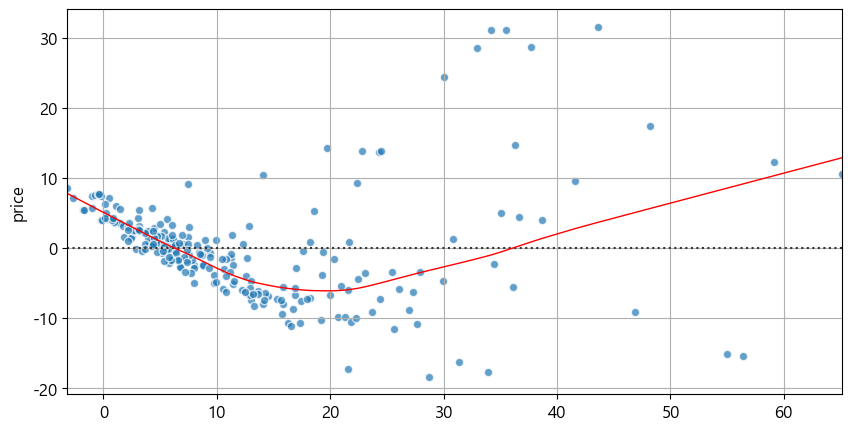


[ÏûîÏ∞®Ïùò Ï†ïÍ∑úÏÑ± Í∞ÄÏ†ï]


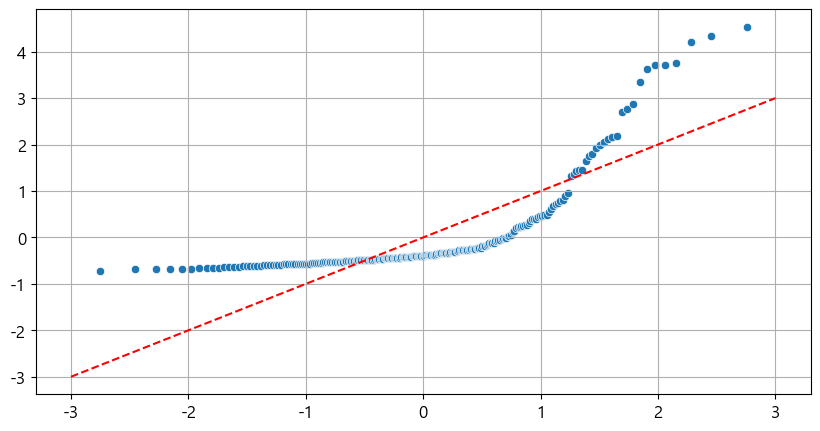

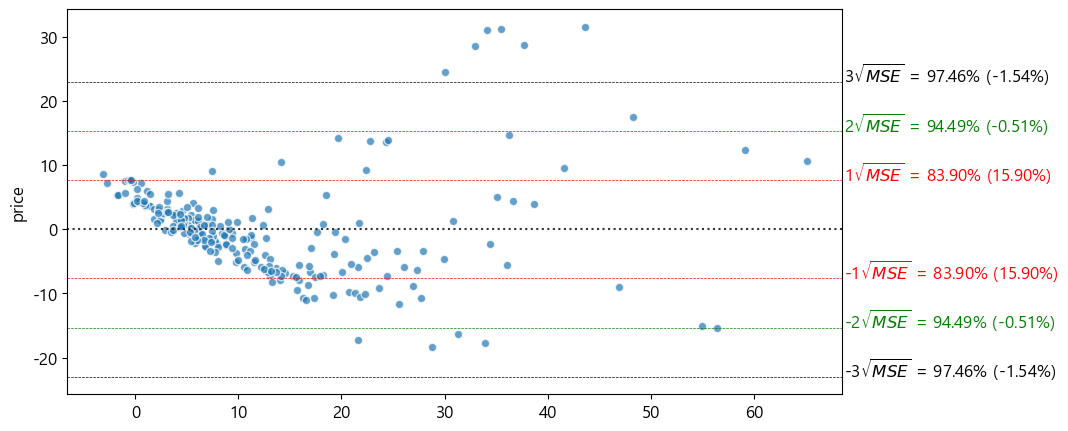

Î£®Ìä∏ 1MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 83.90% (15.898305084745758)
Î£®Ìä∏ 2MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 94.49% (-0.5084745762711833)
Î£®Ìä∏ 3MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 97.46% (-1.5423728813559308)
ÏûîÏ∞®Ïùò Ï†ïÍ∑úÏÑ± Í∞ÄÏ†ï Ï∂©Ï°± Ïó¨Î∂Ä: False

[ÏûîÏ∞®Ïùò Îì±Î∂ÑÏÇ∞ÏÑ± Í∞ÄÏ†ï]
ÏûîÏ∞®Ïùò Îì±Î∂ÑÏÇ∞ÏÑ± Í∞ÄÏ†ï Ï∂©Ï°± Ïó¨Î∂Ä: False
+-----------+-------------+
|           |      values |
|-----------+-------------|
| statistic |     72.7433 |
| p-value   | 2.62346e-06 |
| f-value   |     6.09883 |
| f p-value | 4.41215e-11 |
+-----------+-------------+

[ÏûîÏ∞®Ïùò ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ï]
Durbin-Watson: 2.1133107412151446, ÏûîÏ∞®Ïùò ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ï ÎßåÏ°± Ïó¨Î∂Ä: True


In [83]:
final = my_linear_regression(x_train_ignore, y_train, x_test_ignore, y_test, dpi = 100, use_plot = False, report = True, resid_test = True)

In [84]:
from sklearn.linear_model import Ridge, Lasso
rg = Ridge(alpha = 0.1)
la = Lasso(alpha = 0.01)
rg.fit(x_train_ignore, y_train)
la.fit(x_train_ignore, y_train)
rg.score(x_test_ignore, y_test), la.score(x_test_ignore, y_test)

(0.7485764355895577, 0.7490831112352411)

In [95]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
xgb = XGBRegressor(max_depth = 9)
lgbm = LGBMRegressor(max_depth = 11, verbose = -1)
cat = CatBoostRegressor(logging_level = 'Silent')

In [96]:
xgb.fit(x_train_ignore, y_train)
lgbm.fit(x_train_ignore, y_train)
cat.fit(x_train_ignore, y_train)
xgb.score(x_test_ignore, y_test), lgbm.score(x_test_ignore, y_test), cat.score(x_test_ignore, y_test)

(0.8277137357709665, 0.8415859610549262, 0.8544884089182098)

In [87]:
from sklearn.cluster import KMeans

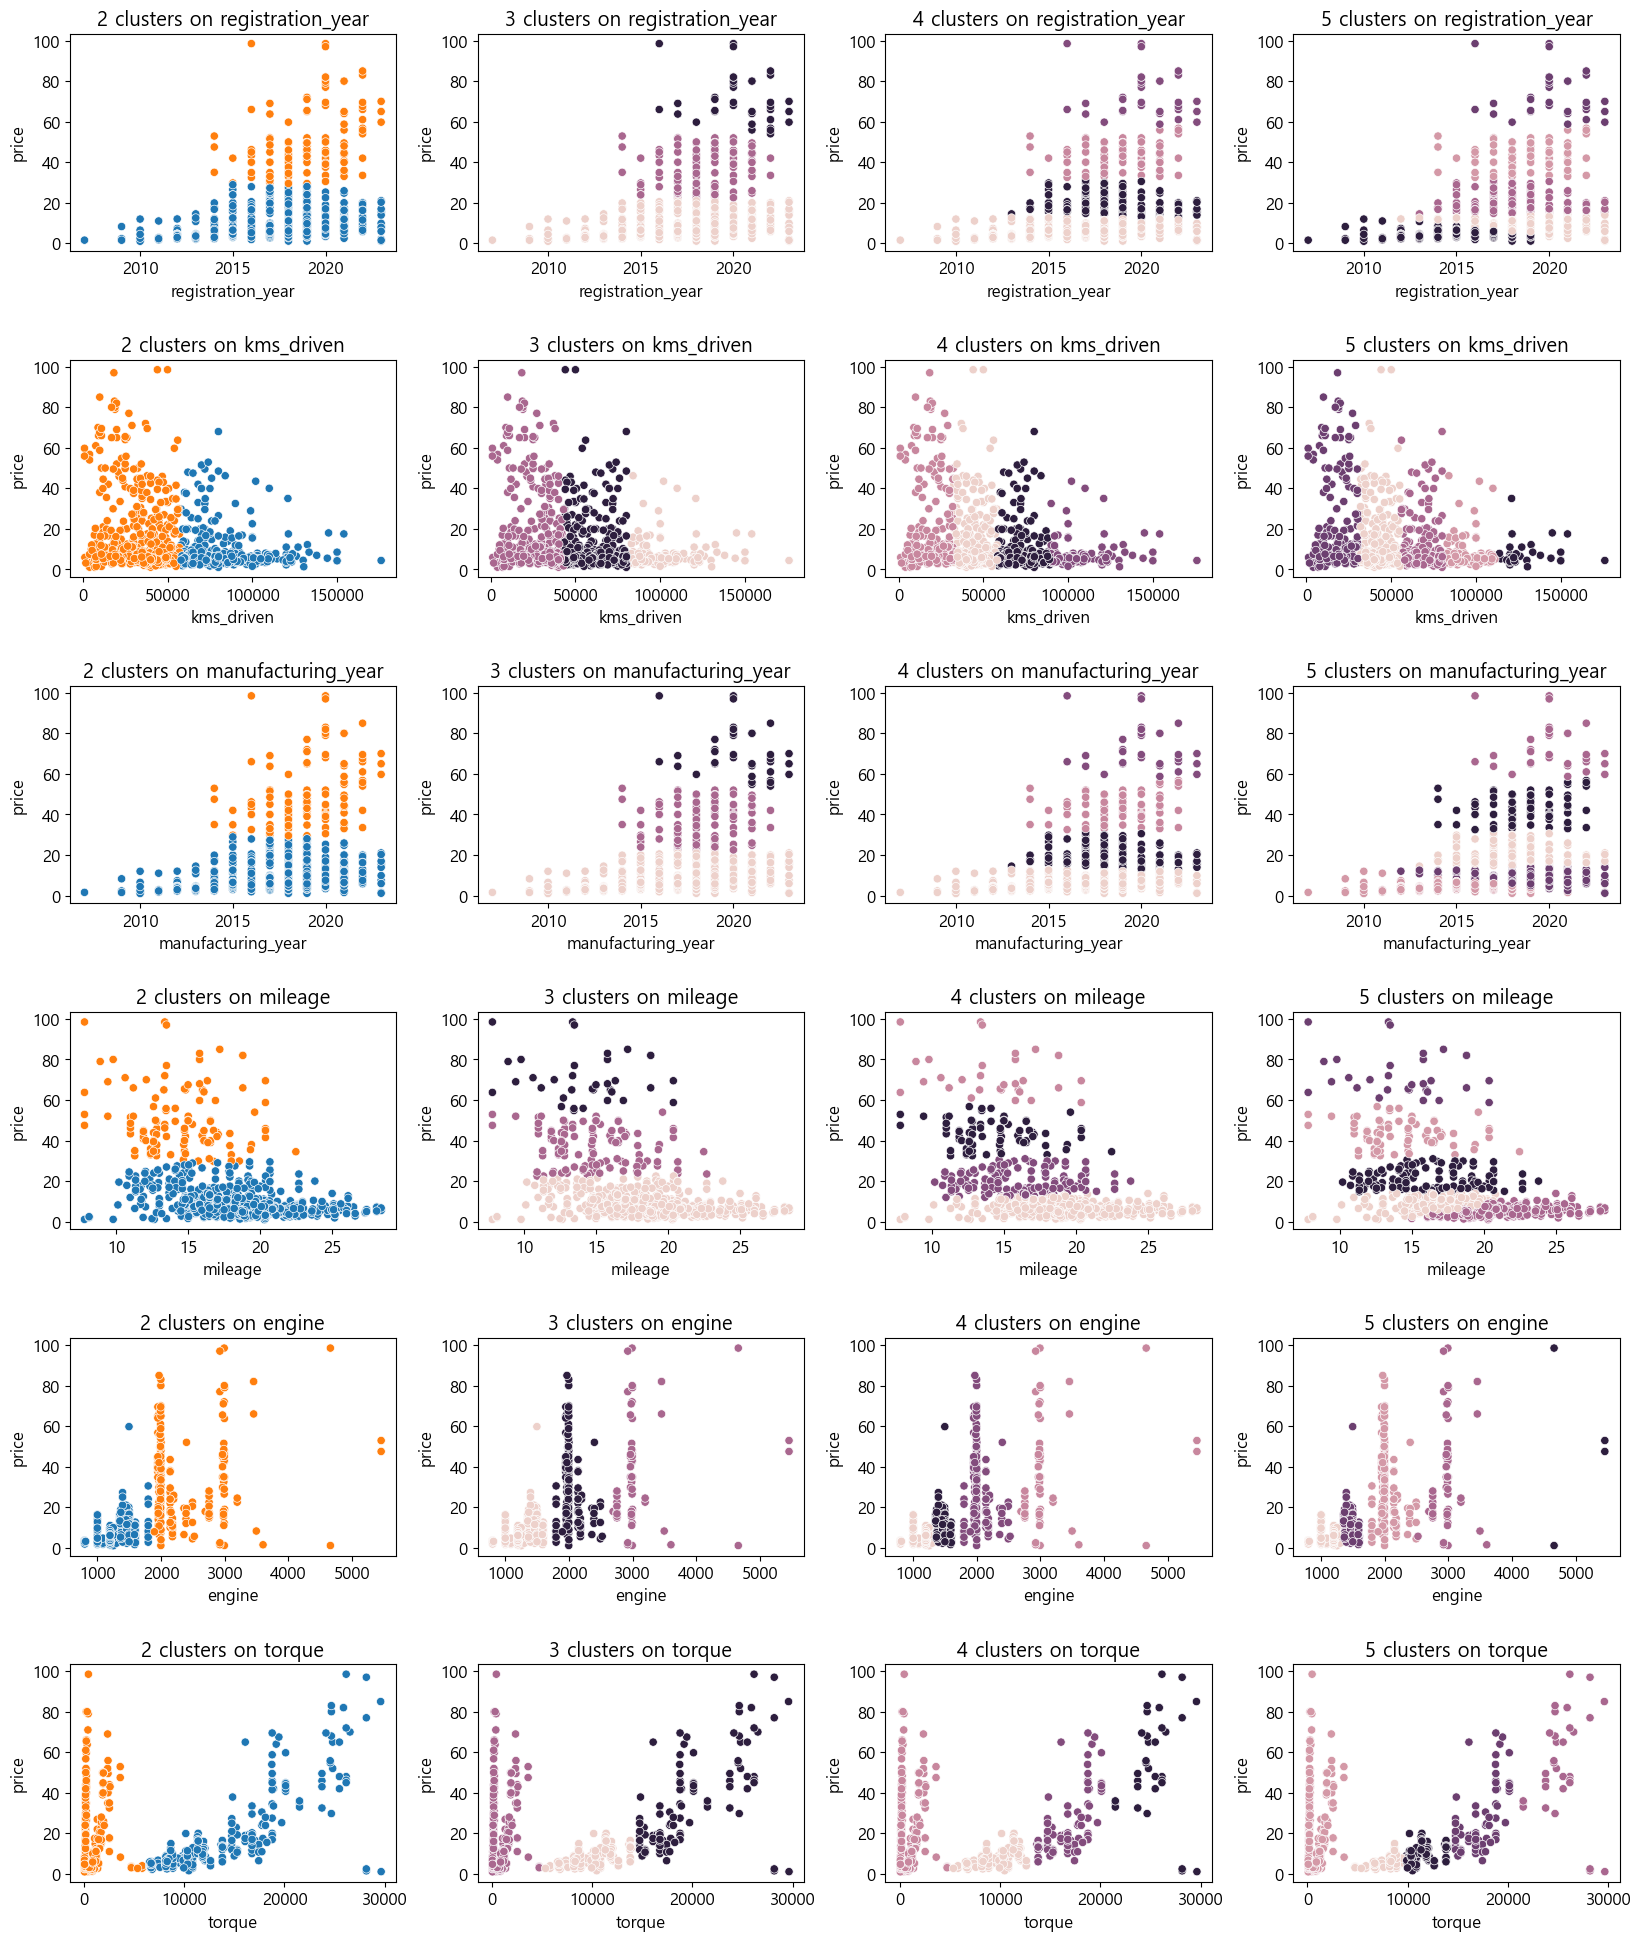

In [88]:
cols = ['registration_year', 'kms_driven', 'manufacturing_year', 'mileage', 'engine', 'torque']
df_log = df.copy()
# df_log['Weekly_Sales'] = np.log(df_log['Weekly_Sales'])

fig, ax = plt.subplots(6, 4, figsize = (20, 24))
fig.subplots_adjust(wspace = 0.25, hspace = 0.5)
for i, v in enumerate(cols):
    tmp = df_log[['price', v]]
    for j in range(2, 6):
        km = KMeans(n_clusters = j, random_state = 0)
        km.fit(tmp)
        tmp2 = pd.concat([tmp, pd.DataFrame(pd.Series(km.labels_, name = 'Cluster'))], axis = 1)
        sb.scatterplot(data = tmp2, x = v, y = 'price', hue = 'Cluster', ax = ax[i, j-2], legend = False)
        ax[i, j-2].set_title(f"{j} clusters on {v}")

plt.show()